In [1]:
import pandas as pd, seaborn as sns, numpy as np

In [65]:
import re 
month_date = '1212'

In [66]:
re.findall(string=path, pattern=f"2019{month_date}")

['20191212']

In [53]:
import os
imp_total = pd.DataFrame([],columns = ['feature', 'importance'])
for path in os.listdir("../data-science-bowl-2019/features/"):
    if "feature_importance" in path and month_date in path:
            imp_total = pd.concat([imp_total, pd.read_csv("../data-science-bowl-2019/features/" + path)], axis=0)

    #     print(path)
    


In [67]:
imp_total["importance"] = imp_total.importance.astype(float)

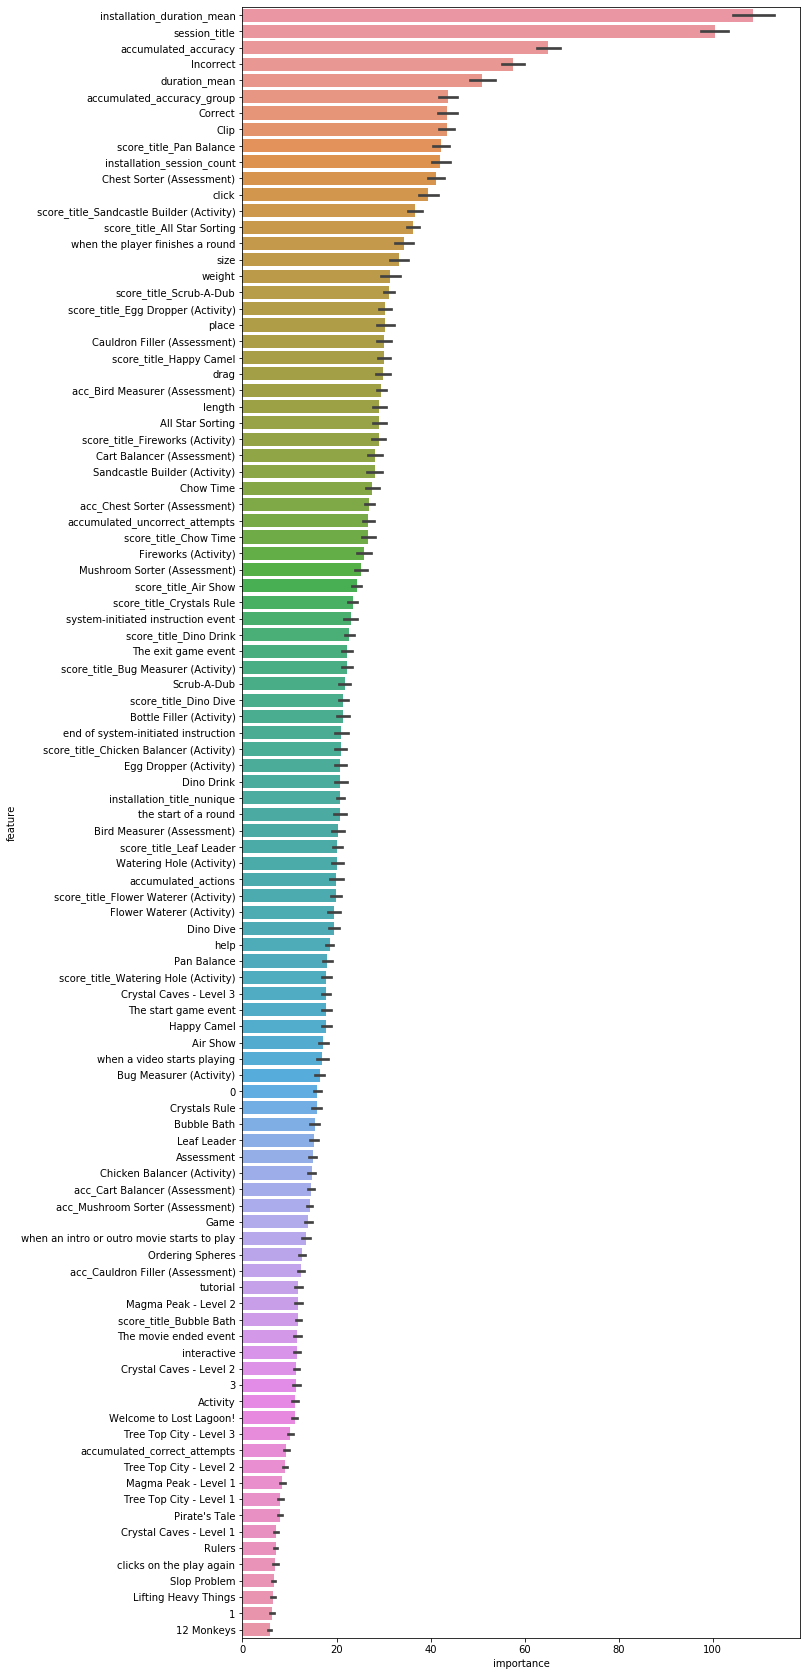

In [77]:
top_features = imp_total.groupby("feature").agg({"importance": ["mean", "std"]}).sort_values(("importance", "mean"), ascending=False).iloc[0:100].index.to_list()
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
def watch_all_featuresImp(imp_total, top_features):
    fig, ax = plt.subplots(figsize=(10, 30))
    sns.barplot(data=imp_total, x='importance', y='feature', orient='h', ax=ax, order=top_features)
watch_all_featuresImp(imp_total)

In [75]:
# imp_total.groupby("feature")#.plot(kind="box", figsize=(15,8))



In [76]:
# imp_total.groupby("feature").agg({"importance": ["mean", "std"]}).index.to_list()
# top_features

['installation_duration_mean',
 'session_title',
 'accumulated_accuracy',
 'Incorrect',
 'duration_mean',
 'accumulated_accuracy_group',
 'Correct',
 'Clip',
 'score_title_Pan Balance',
 'installation_session_count',
 'Chest Sorter (Assessment)',
 'click',
 'score_title_Sandcastle Builder (Activity)',
 'score_title_All Star Sorting',
 'when the player finishes a round',
 'size',
 'weight',
 'score_title_Scrub-A-Dub',
 'score_title_Egg Dropper (Activity)',
 'place',
 'Cauldron Filler (Assessment)',
 'score_title_Happy Camel',
 'drag',
 'acc_Bird Measurer (Assessment)',
 'length',
 'All Star Sorting',
 'score_title_Fireworks (Activity)',
 'Cart Balancer (Assessment)',
 'Sandcastle Builder (Activity)',
 'Chow Time',
 'acc_Chest Sorter (Assessment)',
 'accumulated_uncorrect_attempts',
 'score_title_Chow Time',
 'Fireworks (Activity)',
 'Mushroom Sorter (Assessment)',
 'score_title_Air Show',
 'score_title_Crystals Rule',
 'system-initiated instruction event',
 'score_title_Dino Drink',
 'The exit game event',
 'score_title_Bug Measurer (Activity)',
 'Scrub-A-Dub',
 'score_title_Dino Dive',
 'Bottle Filler (Activity)',
 'end of system-initiated instruction',
 'score_title_Chicken Balancer (Activity)',
 'Egg Dropper (Activity)',
 'Dino Drink',
 'installation_title_nunique',
 'the start of a round',
 'Bird Measurer (Assessment)',
 'score_title_Leaf Leader',
 'Watering Hole (Activity)',
 'accumulated_actions',
 'score_title_Flower Waterer (Activity)',
 'Flower Waterer (Activity)',
 'Dino Dive',
 'help',
 'Pan Balance',
 'score_title_Watering Hole (Activity)',
 'Crystal Caves - Level 3',
 'The start game event',
 'Happy Camel',
 'Air Show',
 'when a video starts playing',
 'Bug Measurer (Activity)',
 '0',
 'Crystals Rule',
 'Bubble Bath',
 'Leaf Leader',
 'Assessment',
 'Chicken Balancer (Activity)',
 'acc_Cart Balancer (Assessment)',
 'acc_Mushroom Sorter (Assessment)',
 'Game',
 'when an intro or outro movie starts to play',
 'Ordering Spheres',
 'acc_Cauldron Filler (Assessment)',
 'tutorial',
 'Magma Peak - Level 2',
 'score_title_Bubble Bath',
 'The movie ended event',
 'interactive',
 'Crystal Caves - Level 2',
 '3',
 'Activity',
 'Welcome to Lost Lagoon!',
 'Tree Top City - Level 3',
 'accumulated_correct_attempts',
 'Tree Top City - Level 2',
 'Magma Peak - Level 1',
 'Tree Top City - Level 1',
 "Pirate's Tale",
 'Crystal Caves - Level 1',
 'Rulers',
 'clicks on the play again',
 'Slop Problem',
 'Lifting Heavy Things',
 '1',
 '12 Monkeys']

# CV valuesの分布が知りたい

TBD

In [78]:
import numpy as np

仮説に基づいて特徴量生成

In [125]:
data = pd.read_csv("../data-science-bowl-2019/originals/train.csv")

In [127]:
titles_dict = {'Dino Drink':{"good":'"correct":true',"bad":'"correct":false'},
'Watering Hole (Activity)':{"good":'"filled":true', "bad":'"filled":false'},
'All Star Sorting':{"good":'"correct":true',"bad":'"correct":false'},
'Air Show':{"good":'"correct":true',"bad":'"correct":false'},
'Crystals Rule':{"good":'"correct":true',"bad":'"correct":false'},
'Bubble Bath':{"good":'"correct":true',"bad":'"correct":false'},
'Bottle Filler (Activity)':{"good":["wowSoCool","niceJob","ohWow"]},
'Dino Dive':{"good":'"correct":true',"bad":'"correct":false'},
'Happy Camel':{"good":'"correct":true',"bad":'"correct":false'},
'Pan Balance':{"good":'"correct":true',"bad":'"correct":false'},
'Egg Dropper (Activity)':{"bad":"Buddy_EggsWentToOtherNest", "good":"Buddy_Incoming"},
'Leaf Leader':{"good":'"correct":true',"bad":'"correct":false'},
'Sandcastle Builder (Activity)':{"good":["So cool!", 'Great job! You did it!'],"bad":'need'},
'Scrub-A-Dub':{"good":'"correct":true',"bad":'"correct":false'},
'Chow Time':{"good":'"correct":true',"bad":'"correct":false'},
# not yet to be doneつか完全に遊ぶやつ
'Fireworks (Activity)':4000,
'Flower Waterer (Activity)':4000,
'Bug Measurer (Activity)':4000,
 'Chicken Balancer (Activity)':4000}# measure使ったかいなかで測ろう．

In [163]:
# list(titles_dict.keys())
data.query("type=='Assessment'").title.unique()

array(['Mushroom Sorter (Assessment)', 'Bird Measurer (Assessment)',
       'Cauldron Filler (Assessment)', 'Cart Balancer (Assessment)',
       'Chest Sorter (Assessment)'], dtype=object)

In [169]:
data.query("title == 'Bottle Filler (Activity)'").event_data.to_list()

['{"version":"1.0","round":0,"event_count":1,"game_time":0,"event_code":2000}',
 '{"previous_jars":[],"round":1,"event_count":2,"game_time":157,"event_code":2020}',
 '{"description":"Hello! Today, we\'re making sand art! All we\'ve got to do is take the sand from these bottles, and pour them into this big bottle! You can use any colors, and make whatever pattern you want! Cool, right? Drag a bottle of sand over to the big bottle!","identifier":"hello,takeTheSand,useAnyColors,dragABottle","media_type":"animation","total_duration":16766,"round":1,"event_count":3,"game_time":2714,"event_code":3010}',
 '{"bottle":{"amount":1,"color":"pink"},"bottles":[{"color":"blue","amount":2},{"color":"blue","amount":1},{"color":"purple","amount":2},{"color":"purple","amount":1},{"color":"orange","amount":1},{"color":"orange","amount":2},{"color":"pink","amount":1},{"color":"pink","amount":2},{"color":"yellow","amount":1},{"color":"yellow","amount":2},{"color":"green","amount":1},{"color":"green","amoun

In [170]:
game_category = {'Dino Drink':"size",
 'Watering Hole (Activity)':"size",
 'All Star Sorting':"size",
 'Air Show':"size",
 'Crystals Rule':"length",
 'Bubble Bath':"size",
 'Bottle Filler (Activity)':"size",
 'Dino Dive':"length",
 'Happy Camel':"weight",
 'Pan Balance':"weight",
 'Egg Dropper (Activity)':"weight",
 'Leaf Leader':"weight",
 'Sandcastle Builder (Activity)':"size",
 'Scrub-A-Dub':"size",
 'Chow Time':"weight",
 'Fireworks (Activity)':"length",
 'Flower Waterer (Activity)':"length",
 'Bug Measurer (Activity)':"length",
 'Chicken Balancer (Activity)':"weight"}

In [171]:
np.unique(list(game_category.values()))

array(['length', 'size', 'weight'], dtype='<U6')

In [237]:
pd.read_csv('../data-science-bowl-2019/features/reduce_train.csv').columns.to_list()

['Clip',
 'Activity',
 'Assessment',
 'Game',
 'acc_Cauldron Filler (Assessment)',
 'acc_Mushroom Sorter (Assessment)',
 'acc_Bird Measurer (Assessment)',
 'acc_Chest Sorter (Assessment)',
 'acc_Cart Balancer (Assessment)',
 '2050',
 '4100',
 '2060',
 '4110',
 '2070',
 '2075',
 '2080',
 '2081',
 '2083',
 '3110',
 '3120',
 '3121',
 '4220',
 '4230',
 '5000',
 '4235',
 '5010',
 '4010',
 '4020',
 '4021',
 '4022',
 '4025',
 '4030',
 '4031',
 '3010',
 '4035',
 '4040',
 '3020',
 '3021',
 '4045',
 '2000',
 '4050',
 '2010',
 '2020',
 '4070',
 '2025',
 '2030',
 '4080',
 '2035',
 '2040',
 '4090',
 '4095',
 '9554a50b',
 '5a848010',
 'ca11f653',
 'beb0a7b9',
 '29bdd9ba',
 '0413e89d',
 '8d748b58',
 '6d90d394',
 'ad2fc29c',
 '6088b756',
 'cb1178ad',
 'a44b10dc',
 '1f19558b',
 '31973d56',
 '04df9b66',
 '90d848e0',
 'ecc36b7f',
 'd2278a3b',
 '363d3849',
 '15eb4a7d',
 '160654fd',
 '499edb7c',
 '1beb320a',
 'dcaede90',
 '9b4001e4',
 '532a2afb',
 '3dfd4aa4',
 'a8876db3',
 'd122731b',
 'fbaf3456',
 '3ddc79

In [174]:
{'Mushroom Sorter (Assessment)':"size", 'Bird Measurer (Assessment)':"length",
       'Cauldron Filler (Assessment)':"size", 'Cart Balancer (Assessment)':"weight",
       'Chest Sorter (Assessment)':"size"}

{'Mushroom Sorter (Assessment)': 'size',
 'Bird Measurer (Assessment)': 'length',
 'Cauldron Filler (Assessment)': 'size',
 'Cart Balancer (Assessment)': 'weight',
 'Chest Sorter (Assessment)': 'size'}

In [284]:
def read_data():
    print('Reading train.csv file....')
    train = pd.read_csv('../data-science-bowl-2019/originals/train.csv')
    print('Training.csv file have {} rows and {} columns'.format(train.shape[0], train.shape[1]))

    print('Reading test.csv file....')
    test = pd.read_csv('../data-science-bowl-2019/originals/test.csv')
    print('Test.csv file have {} rows and {} columns'.format(test.shape[0], test.shape[1]))

    print('Reading train_labels.csv file....')
    train_labels = pd.read_csv('../data-science-bowl-2019/originals/train_labels.csv')
    print('Train_labels.csv file have {} rows and {} columns'.format(train_labels.shape[0], train_labels.shape[1]))

    print('Reading specs.csv file....')
    specs = pd.read_csv('../data-science-bowl-2019/originals/specs.csv')
    print('Specs.csv file have {} rows and {} columns'.format(specs.shape[0], specs.shape[1]))

    print('Reading sample_submission.csv file....')
    sample_submission = pd.read_csv('../data-science-bowl-2019/originals/sample_submission.csv')
    print('Sample_submission.csv file have {} rows and {} columns'.format(sample_submission.shape[0], sample_submission.shape[1]))
    return train, test, train_labels, specs, sample_submission

def encode_title(train, test, train_labels, titiles_dict):
    # encode title
    train['title_event_code'] = list(map(lambda x, y: str(x) + '_' + str(y), train['title'], train['event_code']))
    test['title_event_code'] = list(map(lambda x, y: str(x) + '_' + str(y), test['title'], test['event_code']))
    all_title_event_code = list(set(train["title_event_code"].unique()).union(test["title_event_code"].unique()))
    # make a list with all the unique 'titles' from the train and test set
    list_of_user_activities = list(set(train['title'].unique()).union(set(test['title'].unique())))
    # make a list with all the unique 'event_code' from the train and test set
    list_of_event_code = list(set(train['event_code'].unique()).union(set(test['event_code'].unique())))
    list_of_event_id = list(set(train['event_id'].unique()).union(set(test['event_id'].unique())))
    # make a list with all the unique worlds from the train and test set
    list_of_worlds = list(set(train['world'].unique()).union(set(test['world'].unique())))
    # create a dictionary numerating the titles
    activities_map = dict(zip(list_of_user_activities, np.arange(len(list_of_user_activities))))
    activities_labels = dict(zip(np.arange(len(list_of_user_activities)), list_of_user_activities))
    activities_world = dict(zip(list_of_worlds, np.arange(len(list_of_worlds))))
    assess_titles = list(set(train[train['type'] == 'Assessment']['title'].value_counts().index).union(set(test[test['type'] == 'Assessment']['title'].value_counts().index)))

    # indexEncoding to titles_dict
    origin_GameAndAct_titles = list(titles_dict.keys()).copy()
    for key in origin_GameAndAct_titles:
        titles_dict[activities_map[key]] = titles_dict.pop(key)

    # replace the text titles with the number titles from the dict
    train['title'] = train['title'].map(activities_map)
    test['title'] = test['title'].map(activities_map)
    train['world'] = train['world'].map(activities_world)
    test['world'] = test['world'].map(activities_world)
    train_labels['title'] = train_labels['title'].map(activities_map)
    win_code = dict(zip(activities_map.values(), (4100*np.ones(len(activities_map))).astype('int')))
    # then, it set one element, the 'Bird Measurer (Assessment)' as 4110, 10 more than the rest
    win_code[activities_map['Bird Measurer (Assessment)']] = 4110
    # convert text into datetime
    train['timestamp'] = pd.to_datetime(train['timestamp'])
    test['timestamp'] = pd.to_datetime(test['timestamp'])
    
    
    return train, test, train_labels, win_code, list_of_user_activities, \
                list_of_event_code, activities_labels, assess_titles,\
                list_of_event_id, all_title_event_code, titles_dict


In [228]:
class Constants:
    game_category = {'Dino Drink':"size",
    'Watering Hole (Activity)':"size",
    'All Star Sorting':"size",
    'Air Show':"size",
    'Crystals Rule':"length",
    'Bubble Bath':"size",
    'Bottle Filler (Activity)':"size",
    'Dino Dive':"length",
    'Happy Camel':"weight",
    'Pan Balance':"weight",
    'Egg Dropper (Activity)':"weight",
    'Leaf Leader':"weight",
    'Sandcastle Builder (Activity)':"size",
    'Scrub-A-Dub':"size",
    'Chow Time':"weight",
    'Fireworks (Activity)':"length",
    'Flower Waterer (Activity)':"length",
    'Bug Measurer (Activity)':"length",
    'Chicken Balancer (Activity)':"weight"}
    Assessment_category = {'Mushroom Sorter (Assessment)':"size", 'Bird Measurer (Assessment)':"length",
        'Cauldron Filler (Assessment)':"size", 'Cart Balancer (Assessment)':"weight",
        'Chest Sorter (Assessment)':"size"}
    titles_dict = {'Dino Drink':{"good":'"correct":true',"bad":'"correct":false'},
    'Watering Hole (Activity)':{"good":'"filled":true', "bad":'"filled":false'},
    'All Star Sorting':{"good":'"correct":true',"bad":'"correct":false'},
    'Air Show':{"good":'"correct":true',"bad":'"correct":false'},
    'Crystals Rule':{"good":'"correct":true',"bad":'"correct":false'},
    'Bubble Bath':{"good":'"correct":true',"bad":'"correct":false'},
    'Bottle Filler (Activity)':{"good":["wowSoCool","niceJob","ohWow"]},
    'Dino Dive':{"good":'"correct":true',"bad":'"correct":false'},
    'Happy Camel':{"good":'"correct":true',"bad":'"correct":false'},
    'Pan Balance':{"good":'"correct":true',"bad":'"correct":false'},
    'Egg Dropper (Activity)':{"bad":"Buddy_EggsWentToOtherNest", "good":"Buddy_Incoming"},
    'Leaf Leader':{"good":'"correct":true',"bad":'"correct":false'},
    'Sandcastle Builder (Activity)':{"good":["So cool!", 'Great job! You did it!'],"bad":'need'},
    'Scrub-A-Dub':{"good":'"correct":true',"bad":'"correct":false'},
    'Chow Time':{"good":'"correct":true',"bad":'"correct":false'},
    # not yet to be doneつか完全に遊ぶやつ
    'Fireworks (Activity)':4000,
    'Flower Waterer (Activity)':4000,
    'Bug Measurer (Activity)':4000,
    'Chicken Balancer (Activity)':4000}
    @classmethod
    def __init__(self, activities_labels):
        self.index_to_name(activities_labels)
        fields = ["titles_dict", "Assessment_category","game_category"]
        for f_ in fields:
            dict_ = getattr(Constants, f_)
            indexed_dict = {}
            for name, value in dict_.items():
                indexed_dict[Constants.name2idx[name]] = value 
            setattr(Constants, f_+"_indexed" ,indexed_dict)
        pass
    @classmethod
    def index_to_name(self, activities_labels):
        name2idx = {}
        for k, v in activities_labels.items():
            name2idx[v] = k
        self.name2idx = name2idx        

In [231]:
const = Constants(activities_labels)

In [232]:
const.Assessment_category_indexed

{7: 'size', 36: 'length', 1: 'size', 32: 'weight', 15: 'size'}

In [223]:

fields = ["titles_dict", "Assessment_category","game_category"]
for f_ in fields:
    dict_ = getattr(Constants, f_)
    indexed_dict = {}
    for name, value in dict_.items():
        indexed_dict[Constants.name2idx[name]] = value 
    setattr(Constants, f_+"_indexed" ,indexed_dict)

In [227]:
Constants.game_category_indexed

{0: 'size',
 6: 'size',
 43: 'size',
 30: 'size',
 24: 'length',
 10: 'size',
 41: 'size',
 20: 'length',
 12: 'weight',
 13: 'weight',
 28: 'weight',
 31: 'weight',
 17: 'size',
 35: 'size',
 18: 'weight',
 4: 'length',
 9: 'length',
 21: 'length',
 3: 'weight'}

In [285]:
train, test, train_labels, specs, sample_submission = read_data()

Reading train.csv file....
Training.csv file have 11341042 rows and 11 columns
Reading test.csv file....
Test.csv file have 1156414 rows and 11 columns
Reading train_labels.csv file....
Train_labels.csv file have 17690 rows and 7 columns
Reading specs.csv file....
Specs.csv file have 386 rows and 3 columns
Reading sample_submission.csv file....
Sample_submission.csv file have 1000 rows and 2 columns


In [191]:
train, test, train_labels, win_code, list_of_user_activities, \
                list_of_event_code, activities_labels, assess_titles,\
                list_of_event_id, all_title_event_code, titles_dict = encode_title(train, test, train_labels, Constants.titles_dict)

KeyError: 0

{'Dino Drink': 0,
 'Cauldron Filler (Assessment)': 1,
 'Slop Problem': 2,
 'Chicken Balancer (Activity)': 3,
 'Fireworks (Activity)': 4,
 'Welcome to Lost Lagoon!': 5,
 'Watering Hole (Activity)': 6,
 'Mushroom Sorter (Assessment)': 7,
 'Treasure Map': 8,
 'Flower Waterer (Activity)': 9,
 'Bubble Bath': 10,
 'Tree Top City - Level 2': 11,
 'Happy Camel': 12,
 'Pan Balance': 13,
 'Crystal Caves - Level 1': 14,
 'Chest Sorter (Assessment)': 15,
 'Heavy, Heavier, Heaviest': 16,
 'Sandcastle Builder (Activity)': 17,
 'Chow Time': 18,
 'Crystal Caves - Level 2': 19,
 'Dino Dive': 20,
 'Bug Measurer (Activity)': 21,
 'Crystal Caves - Level 3': 22,
 '12 Monkeys': 23,
 'Crystals Rule': 24,
 'Magma Peak - Level 2': 25,
 'Lifting Heavy Things': 26,
 "Pirate's Tale": 27,
 'Egg Dropper (Activity)': 28,
 'Tree Top City - Level 3': 29,
 'Air Show': 30,
 'Leaf Leader': 31,
 'Cart Balancer (Assessment)': 32,
 'Honey Cake': 33,
 'Magma Peak - Level 1': 34,
 'Scrub-A-Dub': 35,
 'Bird Measurer (Assessmen

In [188]:
titles_dict

{0: {'good': '"correct":true', 'bad': '"correct":false'},
 6: {'good': '"filled":true', 'bad': '"filled":false'},
 43: {'good': '"correct":true', 'bad': '"correct":false'},
 30: {'good': '"correct":true', 'bad': '"correct":false'},
 24: {'good': '"correct":true', 'bad': '"correct":false'},
 10: {'good': '"correct":true', 'bad': '"correct":false'},
 41: {'good': ['wowSoCool', 'niceJob', 'ohWow']},
 20: {'good': '"correct":true', 'bad': '"correct":false'},
 12: {'good': '"correct":true', 'bad': '"correct":false'},
 13: {'good': '"correct":true', 'bad': '"correct":false'},
 28: {'bad': 'Buddy_EggsWentToOtherNest', 'good': 'Buddy_Incoming'},
 31: {'good': '"correct":true', 'bad': '"correct":false'},
 17: {'good': ['So cool!', 'Great job! You did it!'], 'bad': 'need'},
 35: {'good': '"correct":true', 'bad': '"correct":false'},
 18: {'good': '"correct":true', 'bad': '"correct":false'},
 4: 4000,
 9: 4000,
 21: 4000,
 3: 4000}

In [286]:
import json
specs["args"] = specs.args.map(lambda x: json.loads(x))

In [273]:
args_lst = []
for i, lst in enumerate(specs.args):
    output_dict = {}
    for dic in lst:
        output_dict.update(dic)
    args_lst.append(output_dict)

In [275]:
specs["full_dict"] = args_lst

In [449]:
# pd.ioの使い方を学ぶ TBD
total = set()


In [452]:
for i in total:
    print(i)

drag
The movie ended event
The exit game event
help
hover
when a video starts playing
Incorrect
Correct
end of system-initiated instruction
the start of a round
interactive
when the player finishes a round
place
clicks on the play again
tutorial
system-initiated instruction event
click
The start game event
when an intro or outro movie starts to play


In [338]:
# specs["key_set"] = specs.full_dict.map(lambda x: set([k['name'] for k in x]))

In [302]:
specs["args_key"] = specs.args.map(lambda x: set([k['name'] for k in x]))

In [454]:
import re
re.sub(string="a a", pattern=" ", repl="_")

'a_a'

In [460]:
# hoge.dict_event_ids
train.query("game_session =='0848ef14a8dc6892'")

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
2,77261ab5,0848ef14a8dc6892,2019-09-06T17:54:56.302Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK
3,b2dba42b,0848ef14a8dc6892,2019-09-06T17:54:56.387Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,2,3010,53,Sandcastle Builder (Activity),Activity,MAGMAPEAK
4,1bb5fbdb,0848ef14a8dc6892,2019-09-06T17:55:03.253Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,3,3110,6972,Sandcastle Builder (Activity),Activity,MAGMAPEAK
5,1325467d,0848ef14a8dc6892,2019-09-06T17:55:06.279Z,"{""coordinates"":{""x"":583,""y"":605,""stage_width"":...",0001e90f,4,4070,9991,Sandcastle Builder (Activity),Activity,MAGMAPEAK
6,1325467d,0848ef14a8dc6892,2019-09-06T17:55:06.913Z,"{""coordinates"":{""x"":601,""y"":570,""stage_width"":...",0001e90f,5,4070,10622,Sandcastle Builder (Activity),Activity,MAGMAPEAK
...,...,...,...,...,...,...,...,...,...,...,...
264,84538528,0848ef14a8dc6892,2019-09-06T17:58:05.792Z,"{""size"":3,""castles_placed"":[{""size"":2,""positio...",0001e90f,263,4020,189518,Sandcastle Builder (Activity),Activity,MAGMAPEAK
265,b2dba42b,0848ef14a8dc6892,2019-09-06T17:58:05.793Z,"{""description"":""So cool!"",""identifier"":""Dot_So...",0001e90f,264,3010,189518,Sandcastle Builder (Activity),Activity,MAGMAPEAK
266,1bb5fbdb,0848ef14a8dc6892,2019-09-06T17:58:07.009Z,"{""description"":""So cool!"",""identifier"":""Dot_So...",0001e90f,265,3110,190735,Sandcastle Builder (Activity),Activity,MAGMAPEAK
267,5e812b27,0848ef14a8dc6892,2019-09-06T17:58:07.423Z,"{""size"":0,""coordinates"":{""x"":782,""y"":207,""stag...",0001e90f,266,4030,191135,Sandcastle Builder (Activity),Activity,MAGMAPEAK


In [478]:
eventIdClassifier.sub_space_underscore()
eventIdClassifier.dict_cls_category

{'The_exit_game_event': 0,
 'Incorrect': 0,
 'Correct': 0,
 'end_of_system-initiated_instruction': 22,
 'the_start_of_a_round': 0,
 'interactive': 0,
 'when_the_player_finishes_a_round': 0,
 'place': 67,
 'clicks_on_the_play_again': 0,
 'help': 1,
 'hover': 0,
 'when_a_video_starts_playing': 0,
 'tutorial': 0,
 'system-initiated_instruction_event': 44,
 'click': 170,
 'The_start_game_event': 1,
 'when_an_intro_or_outro_movie_starts_to_play': 0,
 'drag': 113,
 'The_movie_ended_event': 0}

In [473]:
eventIdClassifier.count_cls_cat(train.query("game_session =='0848ef14a8dc6892'"))
# eventIdClassifier.classification_cls.dict_event_ids

In [472]:
eventIdClassifier = classified_event_id(specs,hoge)

In [471]:
class eda_event_data():
    def __init__(self, specs):
        self.specs = specs
        self.dict_event_ids = {k:set() for k in self.specs.event_id}
    def label_event_id(self, kw):
        events_with_kw = self.specs.loc[self.specs["info"].str.contains(kw), "event_id"].to_list()
        for e_id in events_with_kw:
            self.dict_event_ids[e_id].add(kw)
    def find_isolated_events(self):
        output = []
        for k, v in self.dict_event_ids.items():
            if not v:
                output.append(k)
        return output


from collections import Counter
class Classified_event_id():

    def __init__(self, specs, classification_cls):
        total = set()
        self.classification_cls = classification_cls
        for i in  classification_cls.dict_event_ids.values():
            total = total.union(i)
        self.dict_cls_category = {cls_cat:0 for cls_cat in total}
    def count_cls_cat(self, session):
        """set()のたいしょも入れないといけない。"""
        num_of_session_count = Counter(session["event_id"])
        for event_id in num_of_session_count:
            if self.classification_cls.dict_event_ids[event_id] == set():
                pass
            else:
                for e_category in self.classification_cls.dict_event_ids[event_id]:
                    self.dict_cls_category[e_category] += num_of_session_count[event_id]

    def sub_space_underscore(self):
        keys = self.dict_cls_category.keys()
        for k in keys:
            self.dict_cls_category[re.sub(string=k, pattern=" ", repl="_")] = \
                        self.dict_cls_category.pop(k)
    
            
    

In [318]:
# help action
specs.loc[specs["info"].str.contains("help"), "info"].to_numpy()

# end of system-initiated instruction
specs.loc[specs["info"].str.contains("end of system-initiated instruction"), "info"].to_numpy()

specs.loc[specs["info"].str.contains("clicks on the play again"), "info"].to_numpy()

specs.loc[specs["info"].str.contains("the start of a round"), "info"].to_numpy()

specs.loc[specs["info"].str.contains("The start game event"), "info"].to_numpy()

specs.loc[specs["info"].str.contains("tutorial"), "info"].to_numpy()
# skips the tutorial, finishes the tutorial, at the start of the tutorial

specs.loc[specs["info"].str.contains("The exit game event"), "info"].to_numpy()

specs["info"].to_numpy()
# hovers, drags, submit a solution, ~mushrooms

array(['This event occurs when the player clicks on the help button. It contains information about the state of the game that caused the player to seek help. This event is usually followed by a 3010 (system-initiated instruction) event. It helps identify points that players feel are too difficult.',
       'This event occurs when the player clicks on the help button. It contains information about the state of the game that caused the player to seek help. This event is usually followed by a 3010 (system-initiated instruction) event. It helps identify points that players feel are too difficult.',
       'This event occurs when the player clicks on the help button. It contains information about the state of the game that caused the player to seek help. This event is usually followed by a 3010 (system-initiated instruction) event. It helps identify points that players feel are too difficult.',
       'This event occurs when the player clicks on the help button. It contains information abou

In [438]:
hoge = eda_event_data(specs)
[ hoge.label_event_id(st) for st in
 ["end of system-initiated instruction", "system-initiated instruction event",
  "help", "when an intro or outro movie starts to play","The movie ended event","when a video starts playing",
"Correct","Incorrect", "interactive", "hover", "place","drag", "click", 
  "when the player finishes a round",
"clicks on the play again",
"the start of a round",
"The start game event",
"tutorial","The exit game event"]]
len(hoge.find_isolated_events())

22

In [439]:
hoge.dict_event_ids

{'2b9272f4': {'Correct'},
 'df4fe8b6': {'Incorrect'},
 '3babcb9b': {'end of system-initiated instruction',
  'system-initiated instruction event'},
 '7f0836bf': {'end of system-initiated instruction',
  'system-initiated instruction event'},
 'ab3136ba': {'end of system-initiated instruction',
  'system-initiated instruction event'},
 'bbfe0445': {'end of system-initiated instruction',
  'system-initiated instruction event'},
 'bc8f2793': {'place'},
 '33505eae': {'system-initiated instruction event'},
 'cdd22e43': {'drag', 'place'},
 'd88e8f25': {'Incorrect'},
 '119b5b02': {'hover', 'interactive'},
 '4b5efe37': {'click'},
 '15f99afc': {'end of system-initiated instruction',
  'system-initiated instruction event'},
 '3d63345e': {'drag', 'place'},
 '47026d5f': {'Correct'},
 '93edfe2e': {'click', 'help'},
 '795e4a37': {'system-initiated instruction event'},
 '56817e2b': {'click', 'when the player finishes a round'},
 'a1e4395d': {'system-initiated instruction event'},
 '3afde5dd': {'Corre

In [440]:
# specs.loc[specs.event_id.isin(hoge.find_isolated_events())].to_numpy()

In [339]:
specs["info"].to_numpy()

array(['The end of system-initiated feedback (Correct) event occurs when the game finishes delivering feedback to the player in response to a correct round attempt (pressing the go button with the correct answer). It contains information that describes the duration and content of the instruction, and will likely occur in conjunction with a beat round event. These events are used to determine the effectiveness of the feedback. We can answer questions like, "how much time elapsed while the game was presenting feedback?"',
       'The end of system-initiated feedback (Incorrect) event occurs when the game finishes delivering feedback to the player in response to an incorrect round attempt (pressing the go button with the incorrect answer). It contains information that describes the content of the instruction. These events are used to determine the effectiveness of the feedback. We can answer questions like, "how much time elapsed while the game was presenting feedback?"',
       'The end 

In [442]:
[hoge.dict_event_ids["27253bdc"]]

{'when a video starts playing'}

In [307]:
# args_types = { k:i for i, k in  enumerate(specs.args_key.unique())}

# specs.groupby("args_key").first()

In [377]:
dict_items = hoge.dict_event_ids.items()

TypeError: isdisjoint() takes exactly one argument (0 given)

In [381]:
hoge = eda_event_data(specs)

In [369]:
hoge.label_event_id("help")

In [372]:
# if not set():
#     print("hoge")

In [380]:
class eda_event_data():
    def __init__(self, specs):
        self.specs = specs
        self.dict_event_ids = {k:set() for k in self.specs.event_id}
    def label_event_id(self, kw):
        events_with_kw = self.specs.loc[self.specs["info"].str.contains(kw), "event_id"].to_list()
        for evt_id in events_with_kw:
            self.dict_event_ids[evt_id].add(kw)
    def find_isolated_events(self):
        output = []
        for k, v in self.dict_event_ids.items():
            if not v:
                output.append(k)
        return output
                
        

In [352]:
# specs.index = specs.event_id
specs.loc[specs["info"].str.contains("help"), "event_id"].map(lambda x: "help" if x else None)#.to_dict()

event_id
93edfe2e    93edfe2e
6043a2b4    6043a2b4
05ad839b    05ad839b
37937459    37937459
6aeafed4    6aeafed4
6f8106d9    6f8106d9
77c76bc5    77c76bc5
f54238ee    f54238ee
4e5fc6f5    4e5fc6f5
47f43a44    47f43a44
85d1b0de    85d1b0de
47efca07    47efca07
731c0cbe    731c0cbe
e080a381    e080a381
92687c59    92687c59
eb2c19cd    eb2c19cd
6f4bd64e    6f4bd64e
08ff79ad    08ff79ad
cb1178ad    cb1178ad
67aa2ada    67aa2ada
19967db1    19967db1
e7e44842    e7e44842
8d748b58    8d748b58
d3640339    d3640339
Name: event_id, dtype: object

In [347]:
a = set()

# Analysis with model shap value

In [3]:
import joblib
model = joblib.load("../data-science-bowl-2019/models/model_20191212_165934.pkl")

/Users/junpei.takubo/.venv/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [27]:
model.n_features_

108

In [29]:
train = pd.read_csv("../data-science-bowl-2019/originals/train.csv")
test = pd.read_csv("../data-science-bowl-2019/originals/test.csv")
reduce_train = pd.read_csv("../data-science-bowl-2019/features/reduce_train_revised.csv")
reduce_test = pd.read_csv("../data-science-bowl-2019/features/reduce_test_revised.csv")

In [33]:
train_df.shape

(19708, 107)

ValueError: Number of features of the model must match the input. Model n_features_ is 108 and input n_features is 107 

In [25]:
def preprocess(reduce_train, reduce_test):
    for df in [reduce_train, reduce_test]:
        df['installation_session_count'] = df.groupby(['installation_id'])['Clip'].transform('count')
        df['installation_duration_mean'] = df.groupby(['installation_id'])['duration_mean'].transform('mean')
        #df['installation_duration_std'] = df.groupby(['installation_id'])['duration_mean'].transform('std')
        df['installation_title_nunique'] = df.groupby(['installation_id'])['session_title'].transform('nunique')
        event_codes = [2050, 4100, 4230, 5000, 4235, 2060, 4110, 5010, 2070, 2075, 2080, 2081, 2083, 3110, 4010, 3120, 3121, 4020, 4021, 4022, 4025, 4030, 4031, 3010, 4035, 4040, 3020, 3021, 4045, 2000, 4050, 2010, 2020, 4070, 2025, 2030, 4080, 2035, 2040, 4090, 4220, 4095]
        event_codes_str = [str(ec) for ec in event_codes]
        # df['sum_event_code_count'] = df[[str(ec) for ec in event_codes ]].sum(axis = 1)
        
        # df['installation_event_code_count_mean'] = df.groupby(['installation_id'])['sum_event_code_count'].transform('mean')
        #df['installation_event_code_count_std'] = df.groupby(['installation_id'])['sum_event_code_count'].transform('std')
        # try:
        #     df.drop(columns=event_codes, inplace=True)
        # except KeyError:
        #     df.drop(columns=event_codes_str, inplace=True)
    features = reduce_train.loc[(reduce_train.sum(axis=1) != 0), (reduce_train.sum(axis=0) != 0)].columns # delete useless columns
    features = [x for x in features if x not in ['accuracy_group', 'installation_id']] + ['acc_' + title for title in assess_titles]
    return reduce_train, reduce_test, features

In [30]:
assess_titles = list(set(train[train['type'] == 'Assessment']['title'].value_counts().index).union(set(test[test['type'] == 'Assessment']['title'].value_counts().index)))
reduce_train, reduce_test, features = preprocess(reduce_train, reduce_test)

In [2]:
train_X = pd.read_csv("../trials/hogehoge_train.csv")


In [50]:
set(train_X.columns) - set(train_df.columns)

{'installation_duration_mean',
 'installation_session_count',
 'installation_title_nunique'}

In [51]:
set(train_df.columns) - set(train_X.columns) 

{'accuracy_group', 'installation_id'}

In [52]:
model.predict(train_X) 

array([1.35736209, 0.5332417 , 0.74452538, ..., 1.30492393, 1.43267482,
       2.0535749 ])

In [4]:
import shap

In [10]:
reduce_train['accuracy_group']

0        3
1        0
2        3
3        2
4        3
        ..
19703    1
19704    3
19705    1
19706    2
19707    3
Name: accuracy_group, Length: 19708, dtype: int64

In [51]:

# load JS visualization code to notebook
shap.initjs()

# train XGBoost model

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(train_X)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], train_X.iloc[0,:])

In [57]:
# visualize the training set predictions
# shap.force_plot(explainer.expected_value, shap_values, train_X)

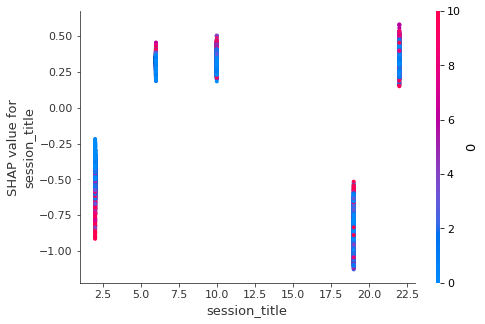

In [58]:
# create a dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("session_title", shap_values, train_X)

In [ ]:
# create a dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("session_title", shap_values, train_X)

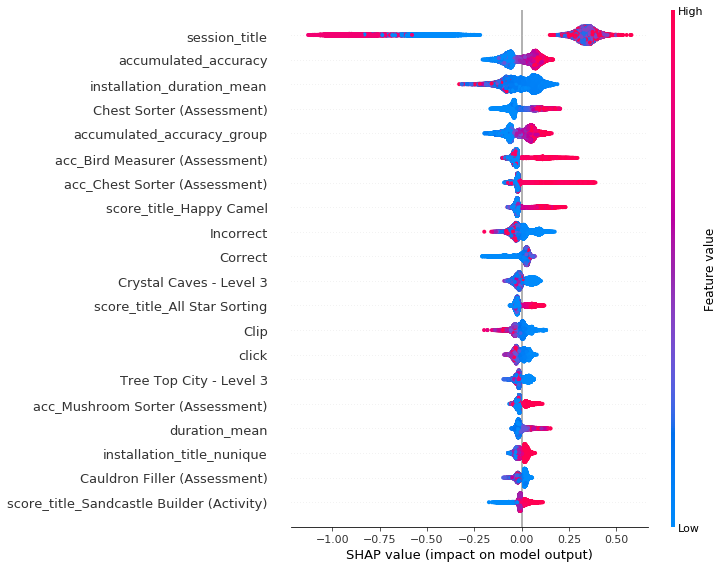

In [59]:
shap.summary_plot(shap_values, train_X)

In [63]:
# shap.force_plot(explainer.expected_value, shap_values, train_X, link="logit")

In [12]:
shap_interaction_values = shap.TreeExplainer(model).shap_interaction_values(train_X.iloc[:2000,:])
 #= shap.TreeExplainer(model).shap_interaction_values(X.iloc[:2000,:])

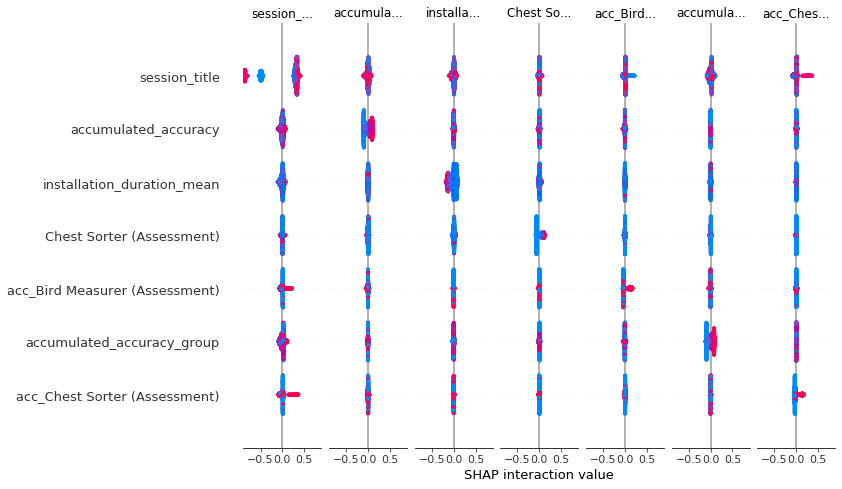

In [66]:
shap.summary_plot(shap_interaction_values, train_X.iloc[:2000,:])

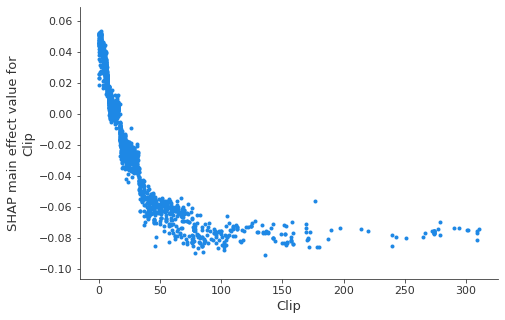

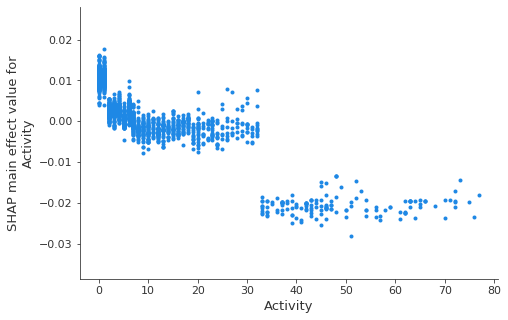

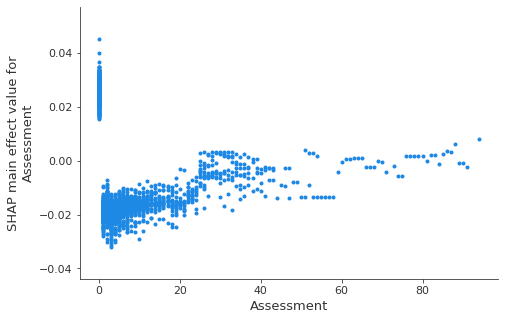

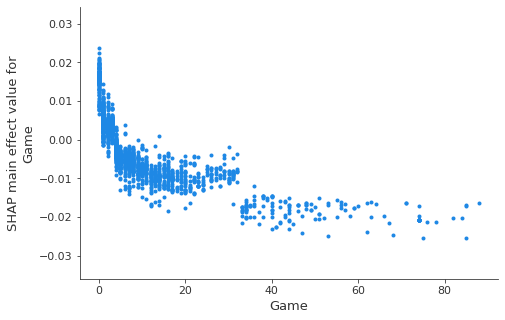

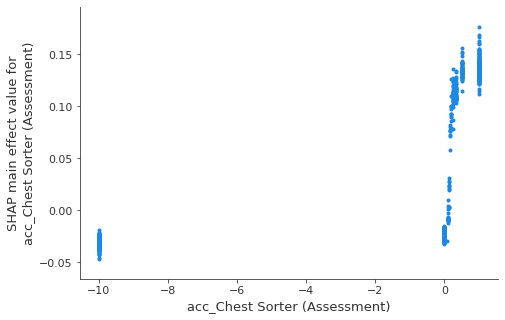

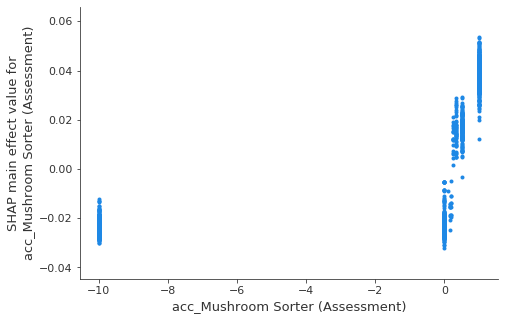

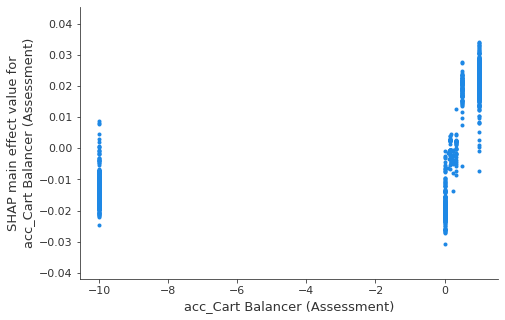

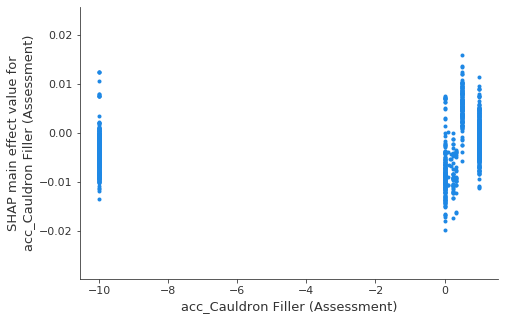

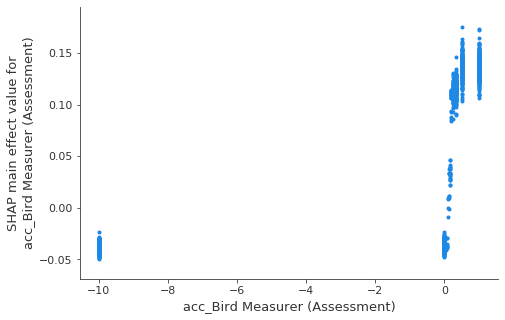

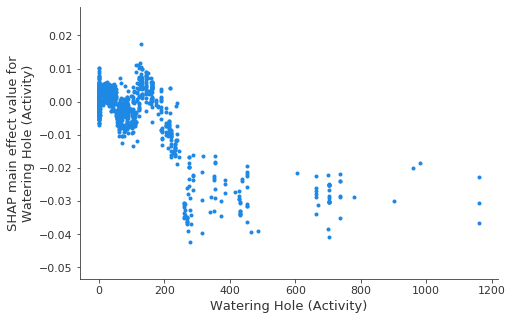

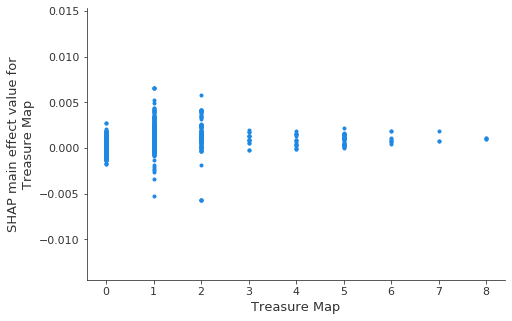

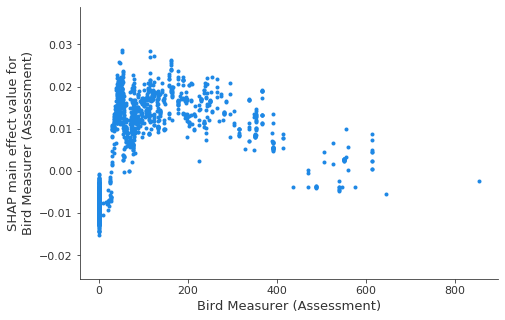

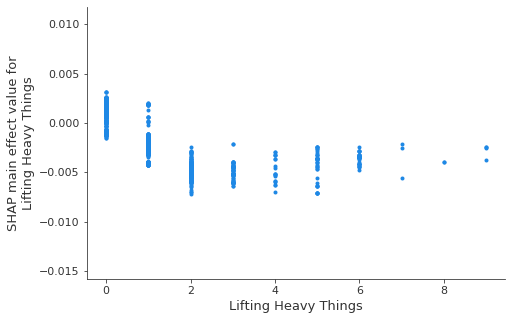

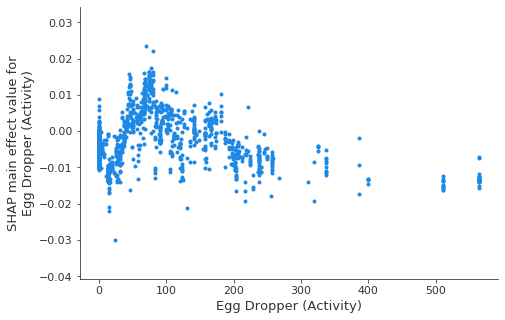

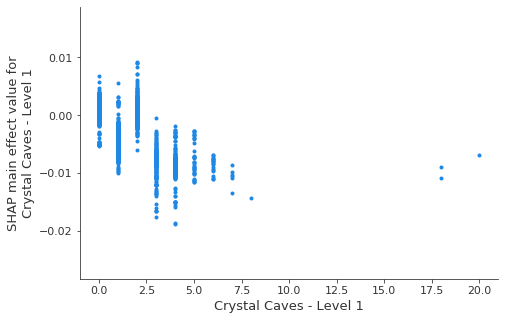

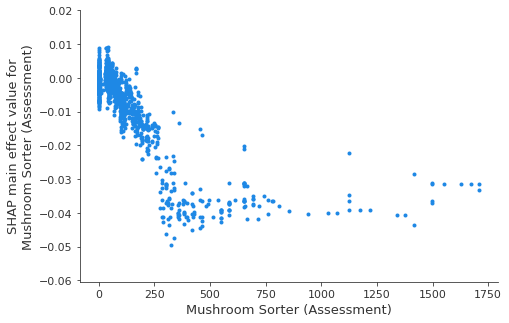

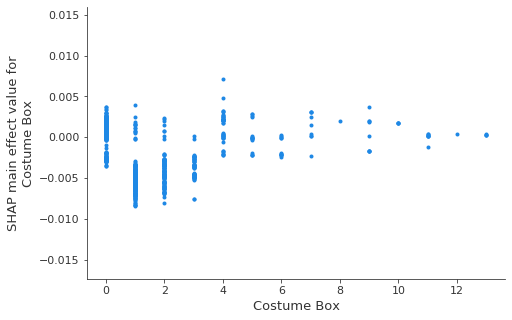

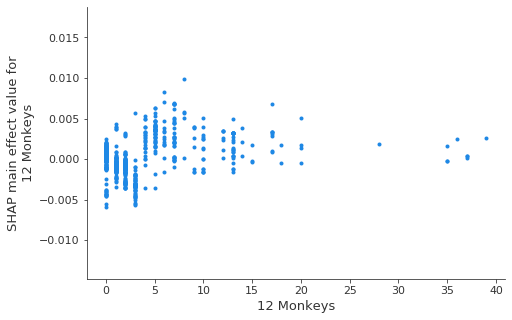

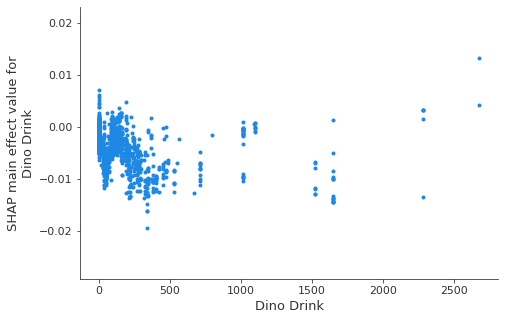

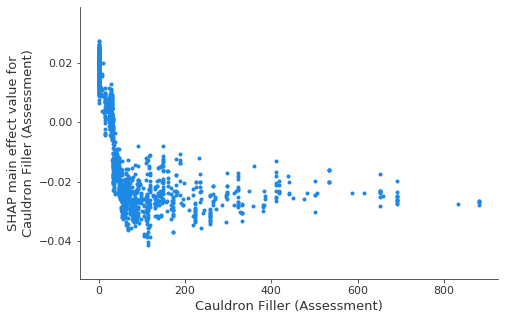

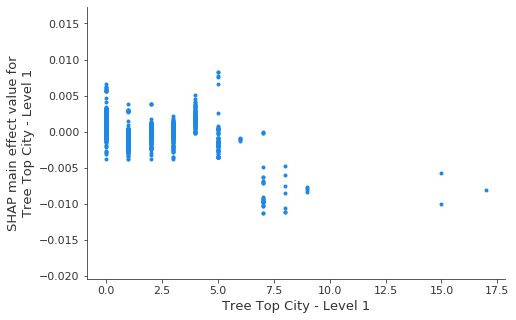

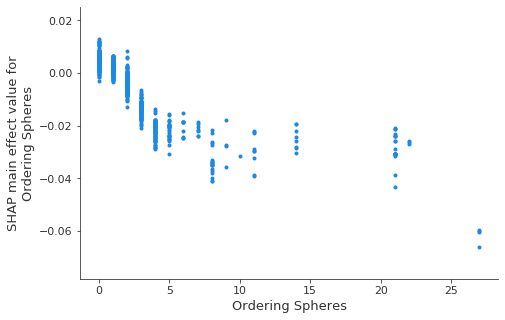

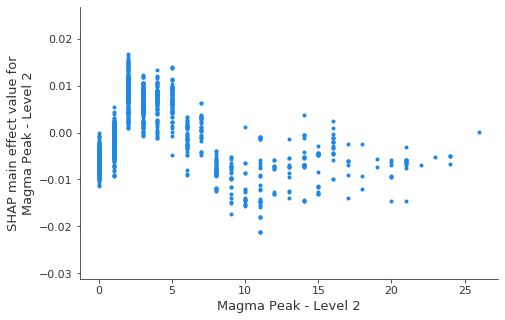

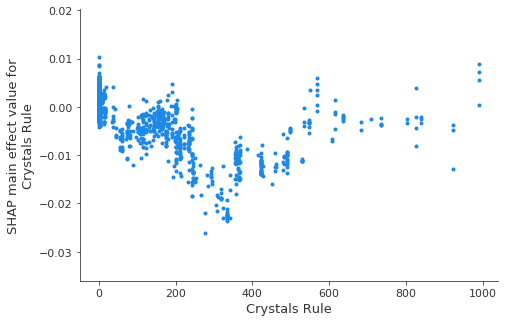

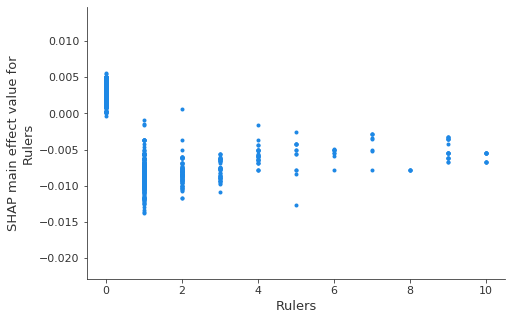

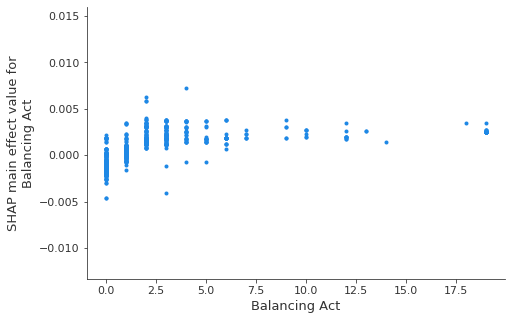

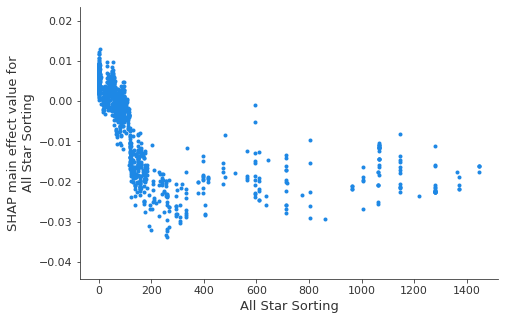

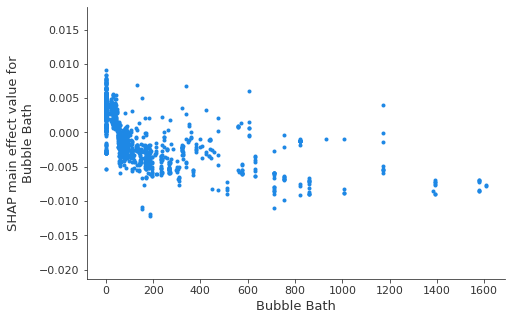

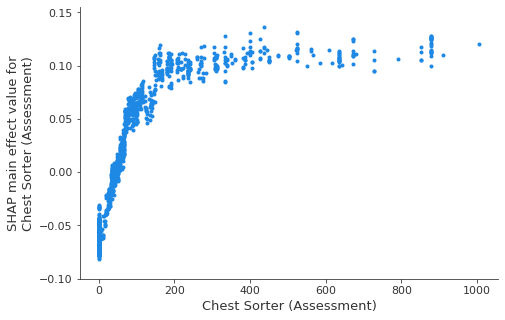

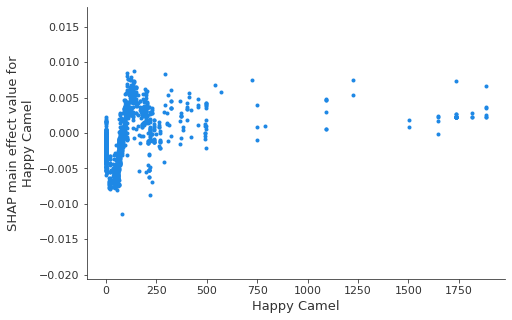

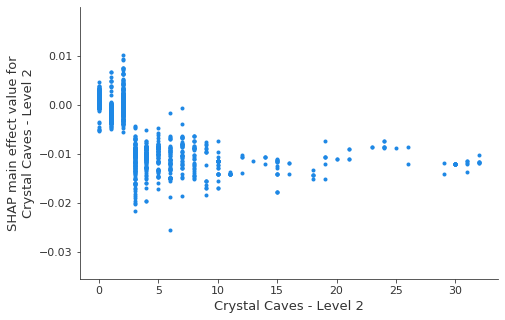

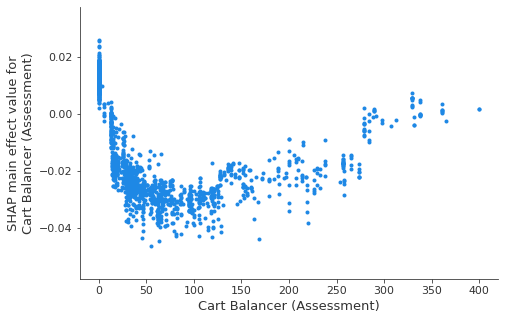

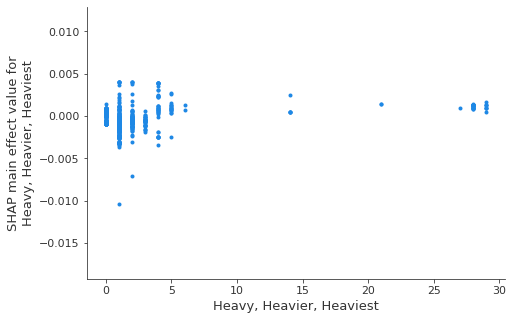

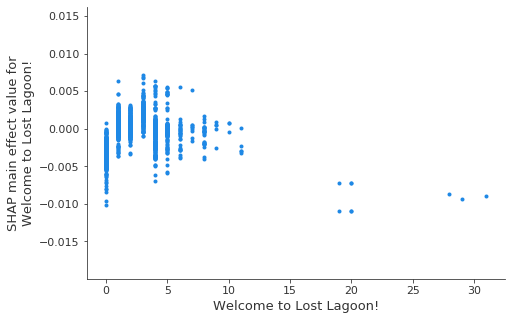

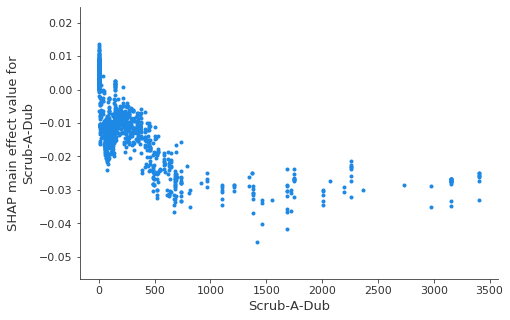

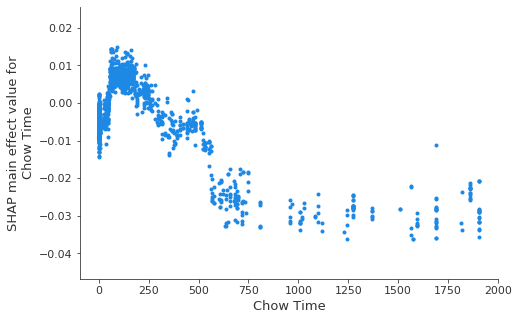

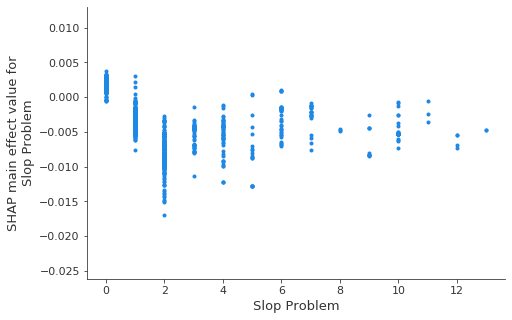

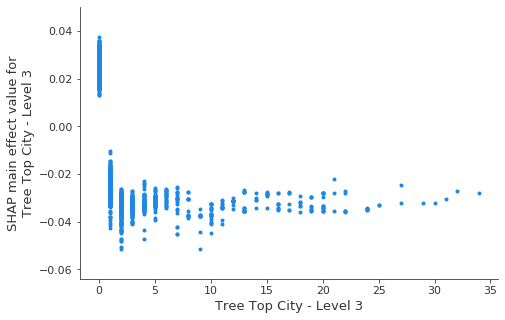

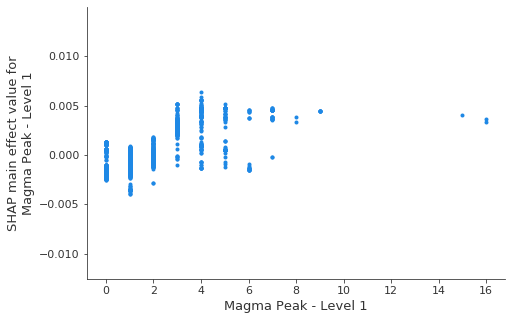

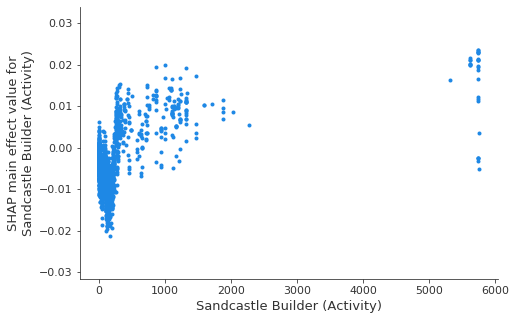

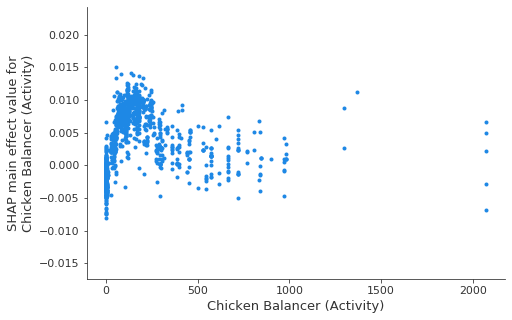

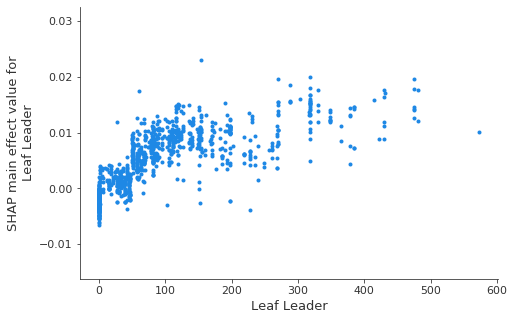

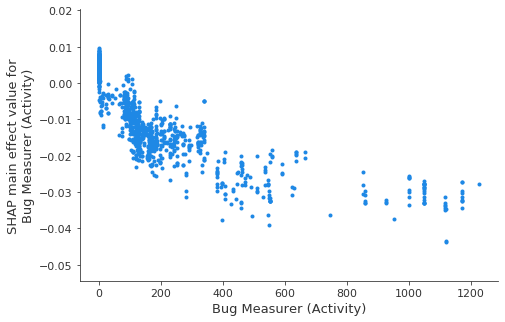

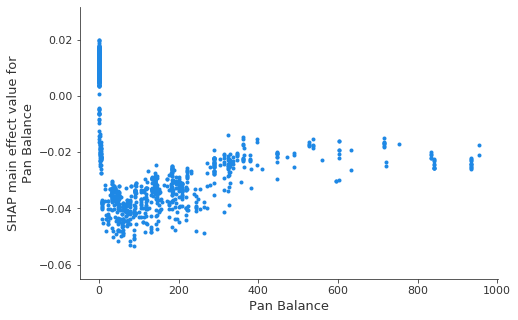

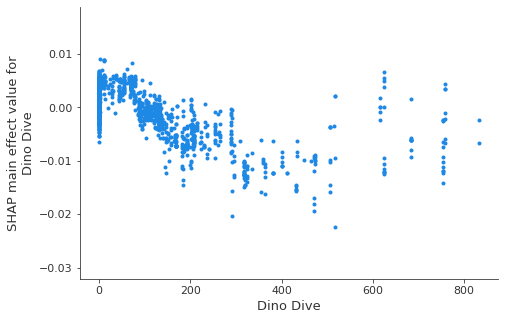

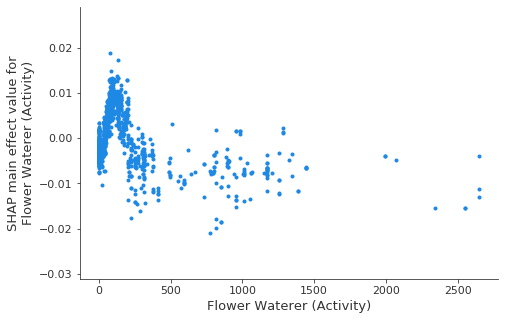

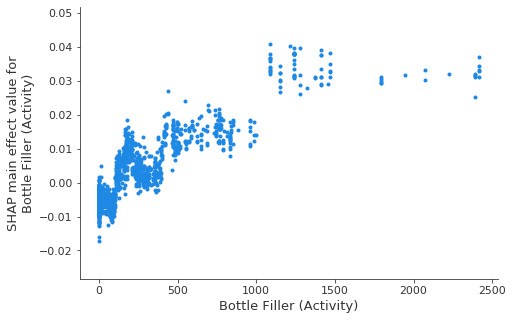

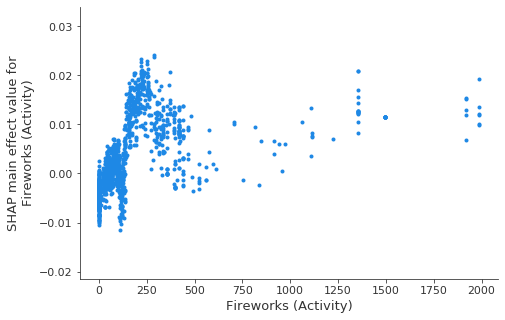

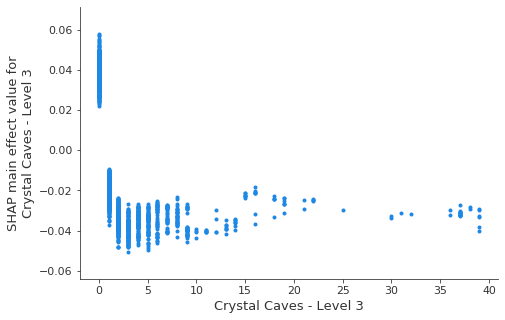

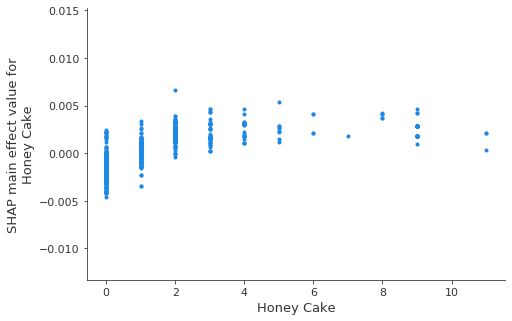

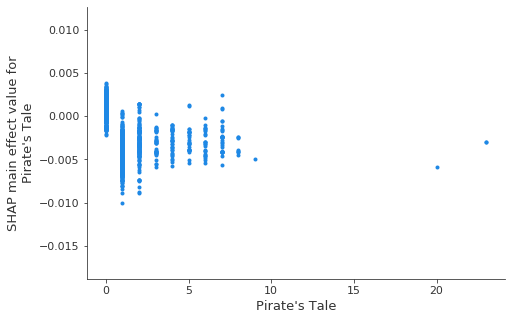

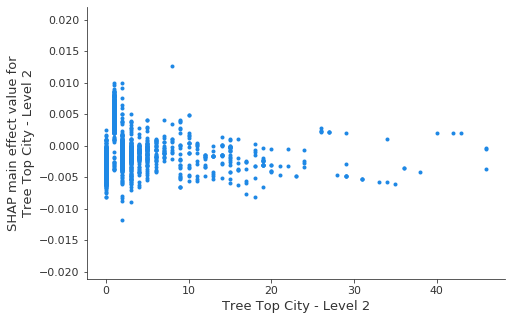

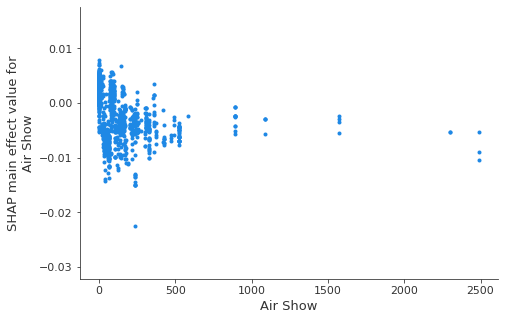

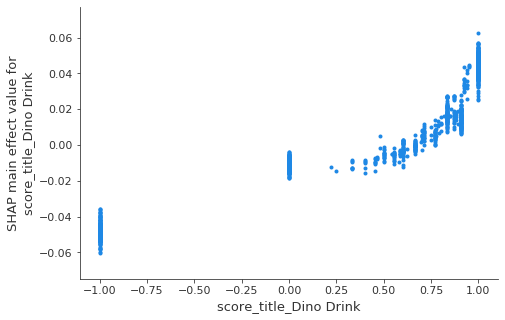

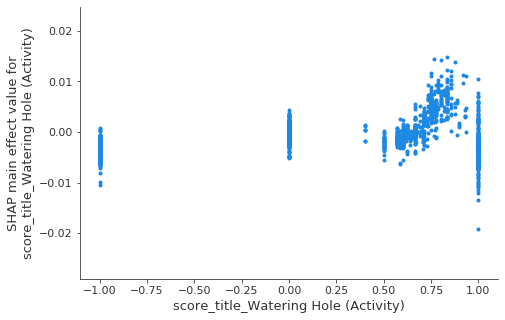

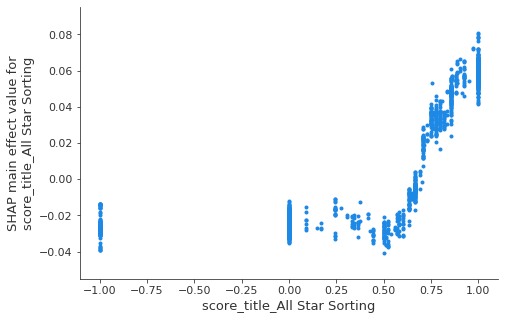

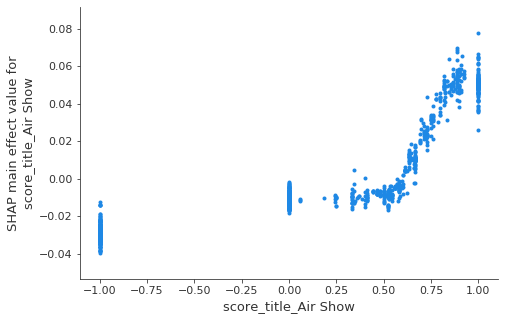

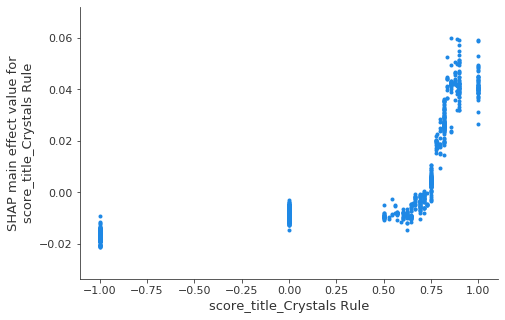

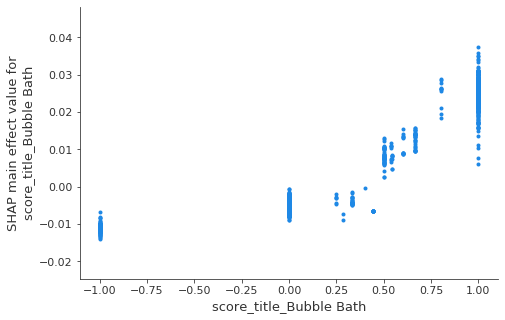

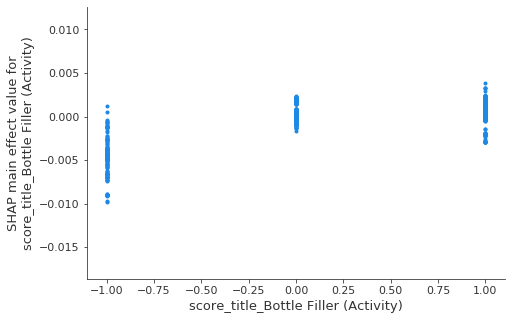

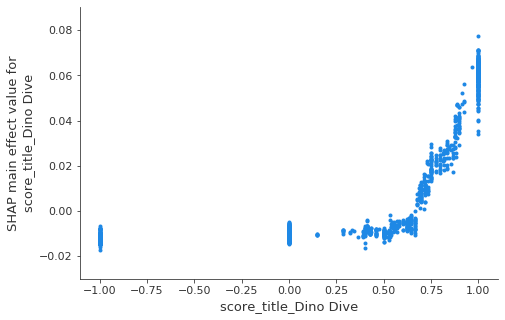

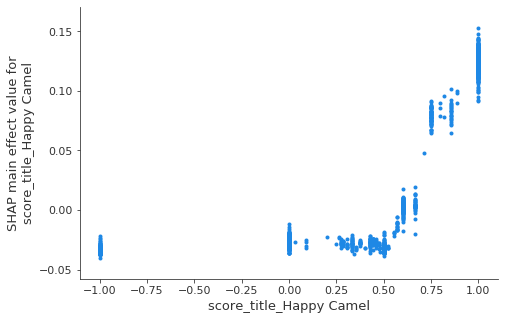

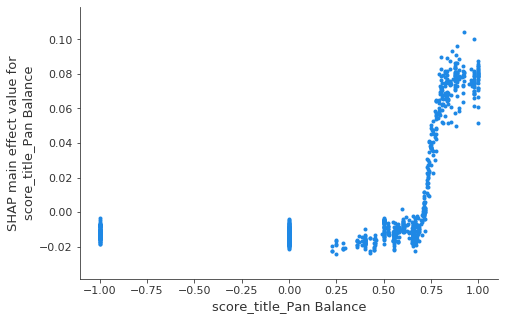

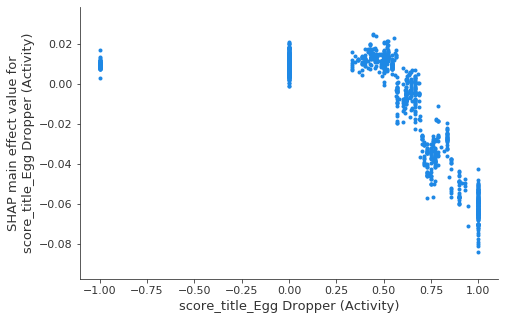

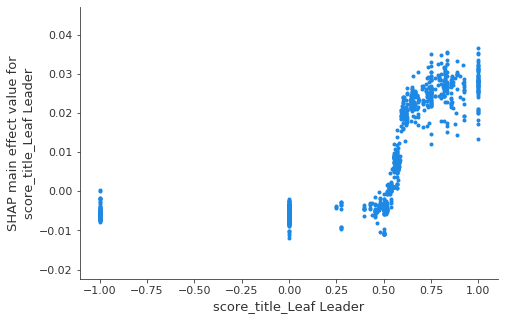

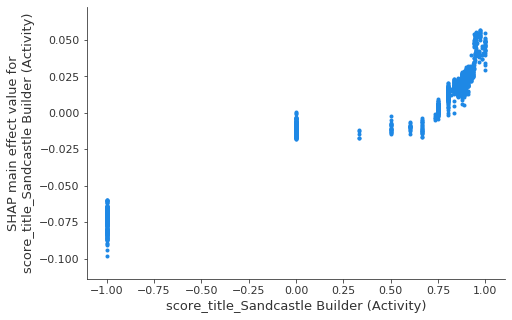

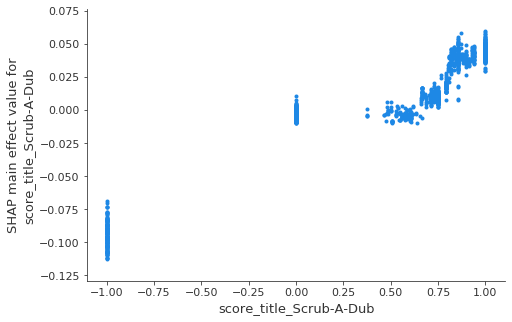

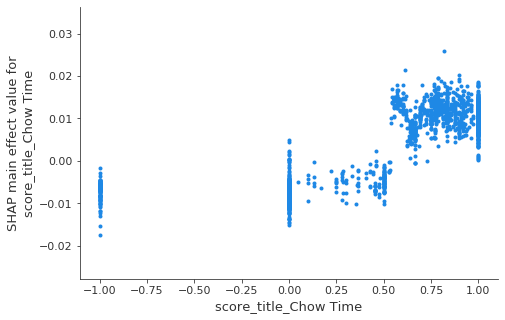

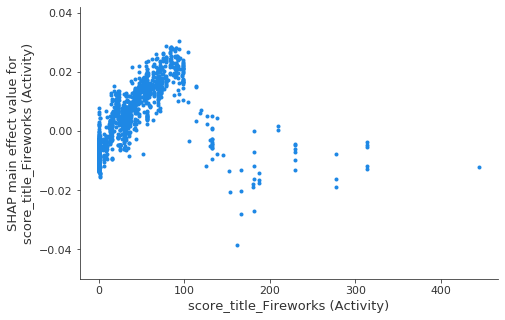

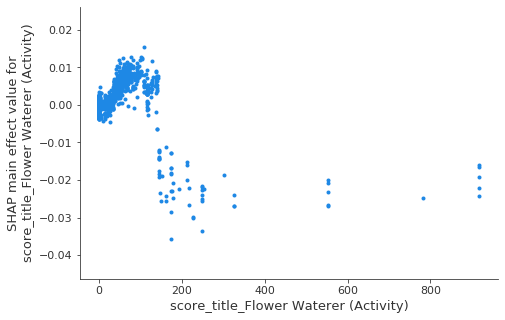

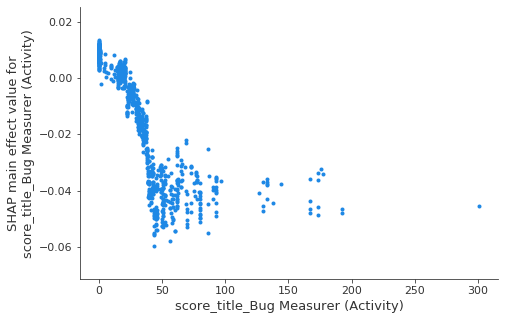

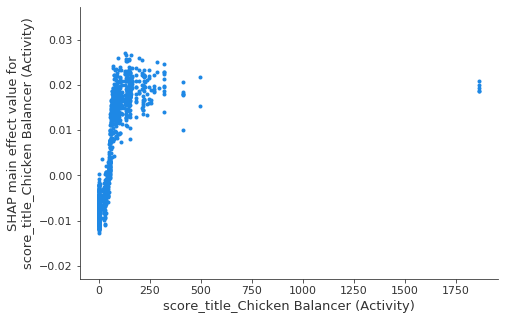

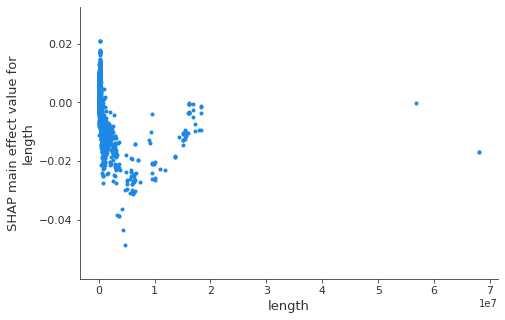

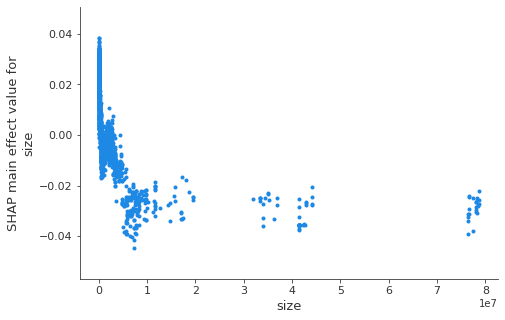

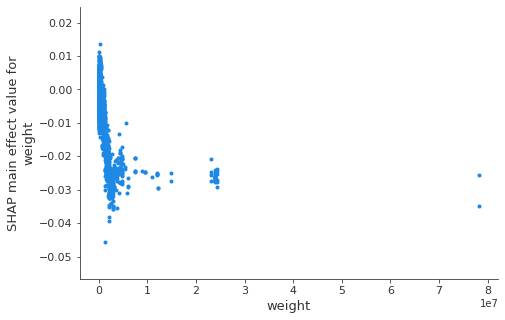

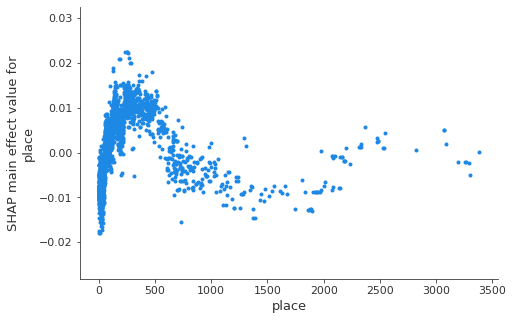

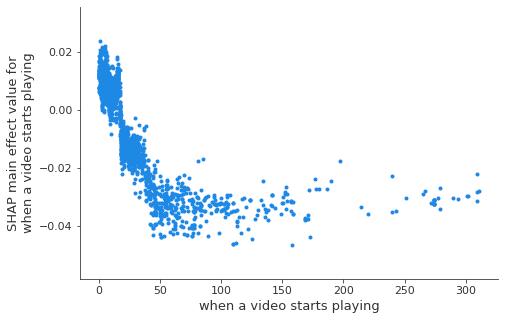

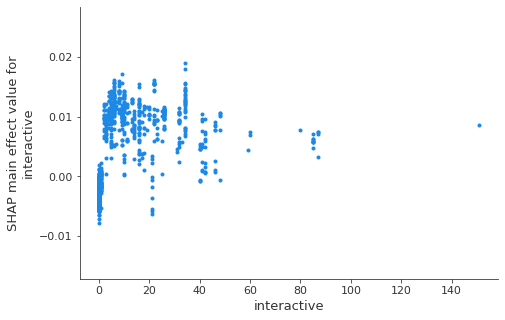

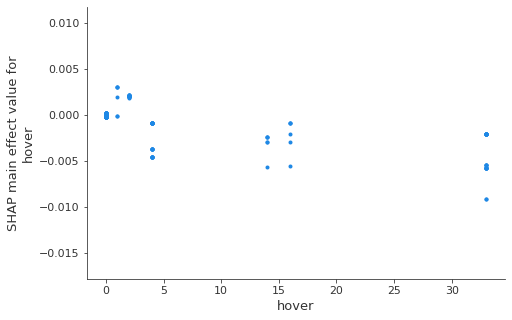

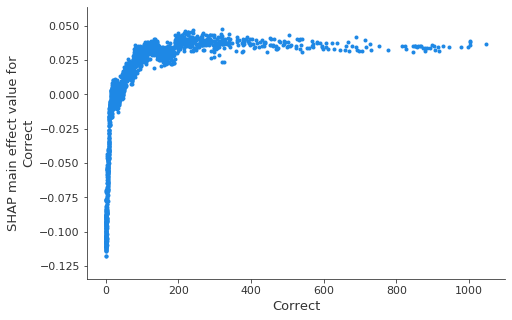

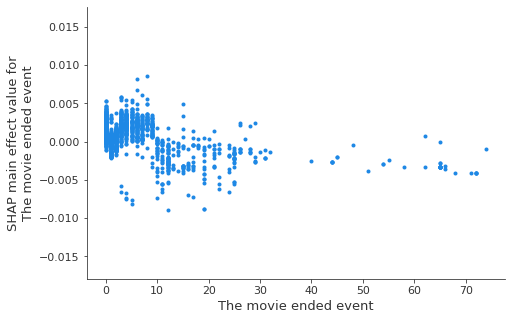

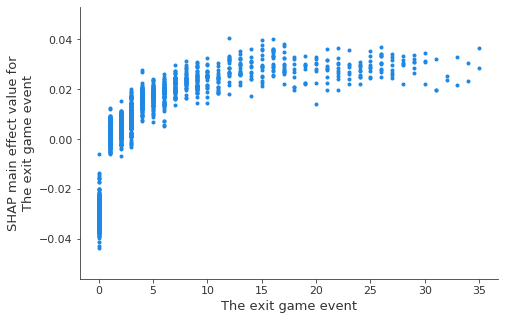

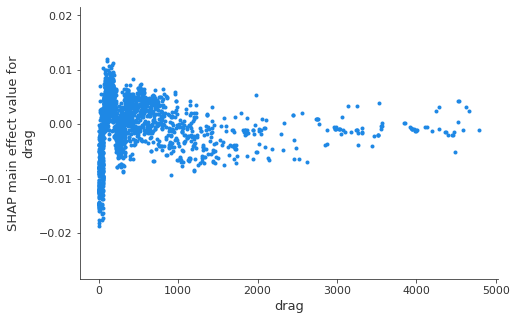

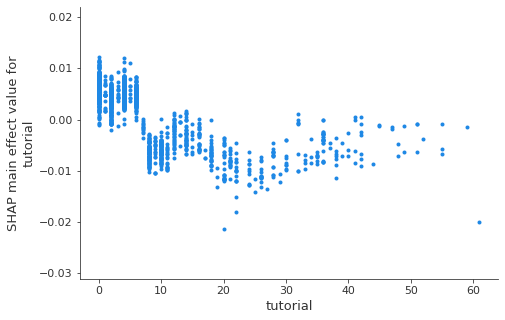

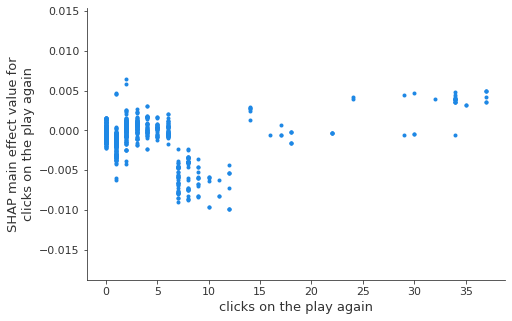

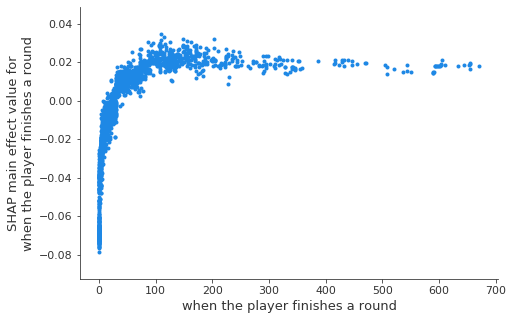

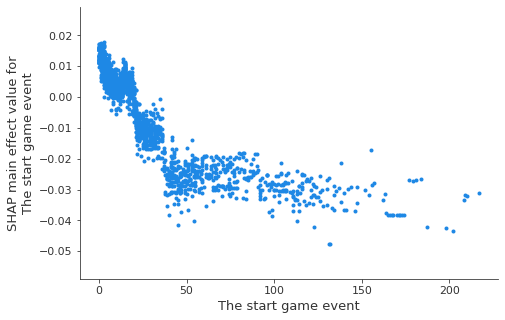

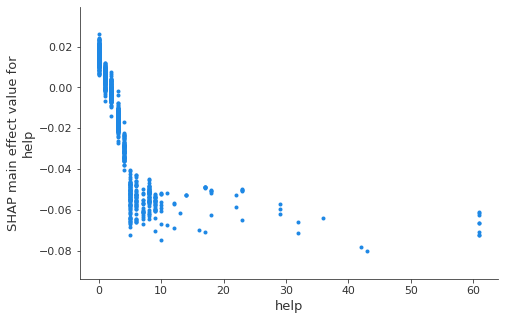

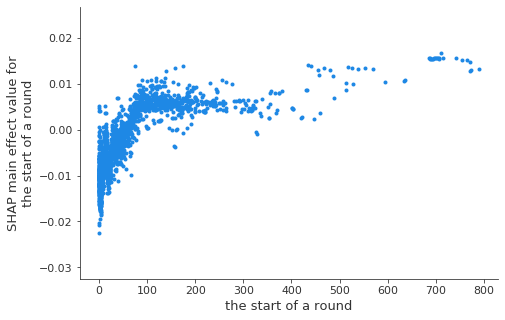

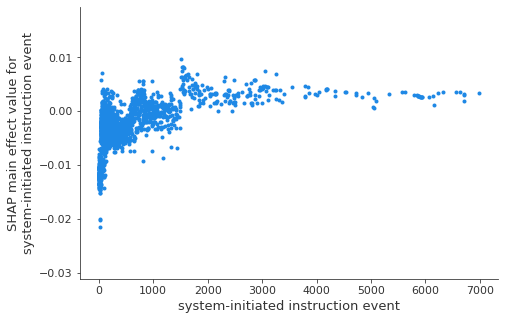

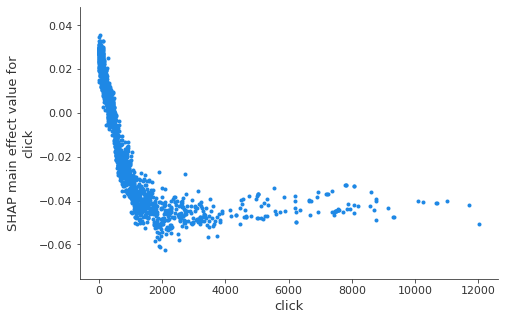

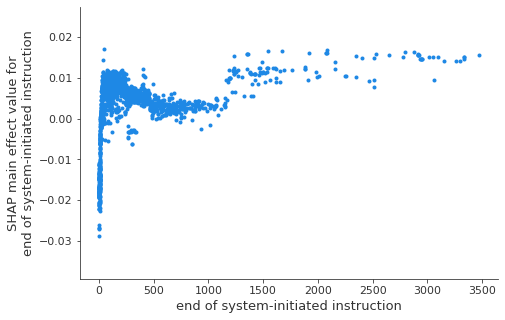

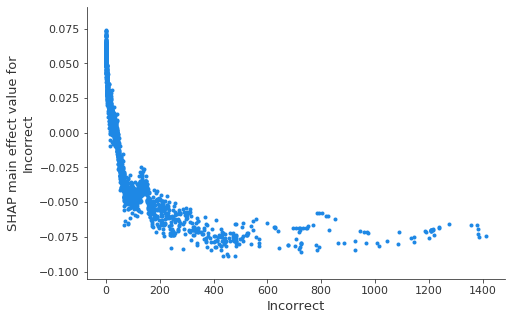

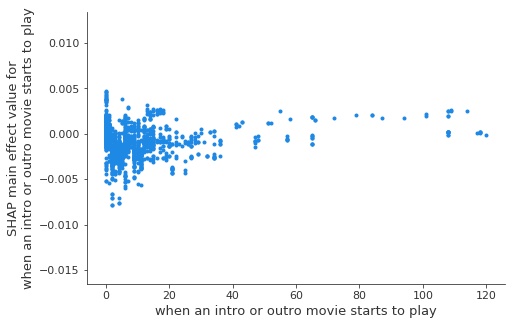

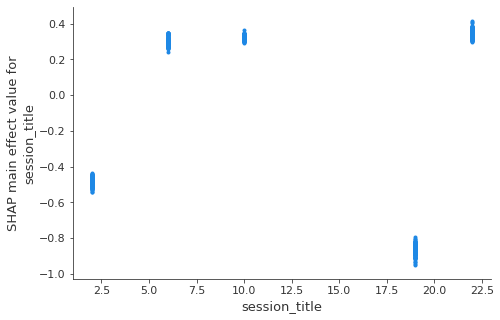

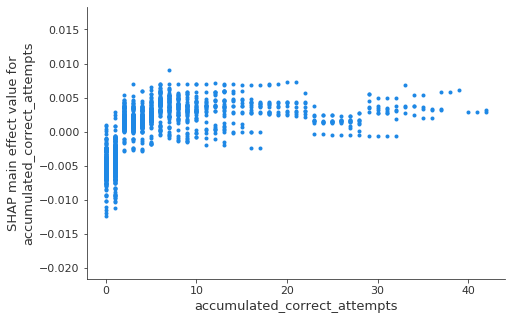

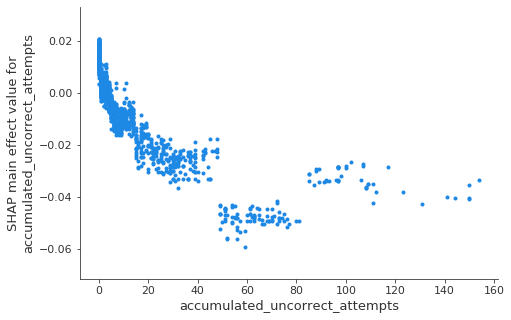

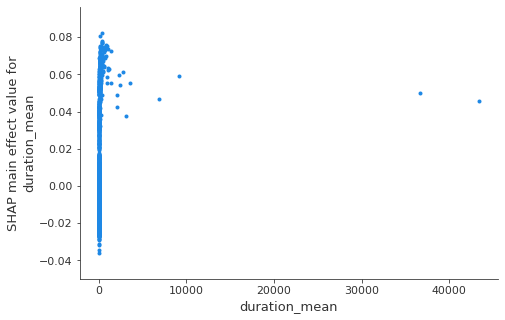

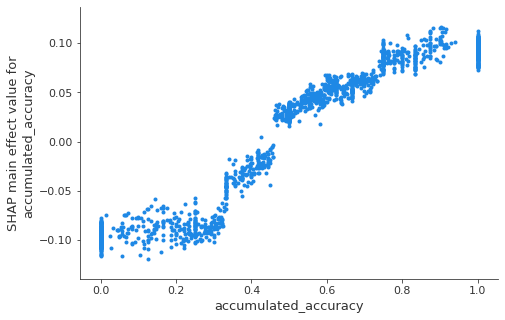

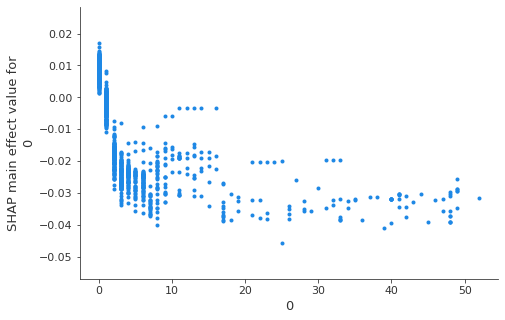

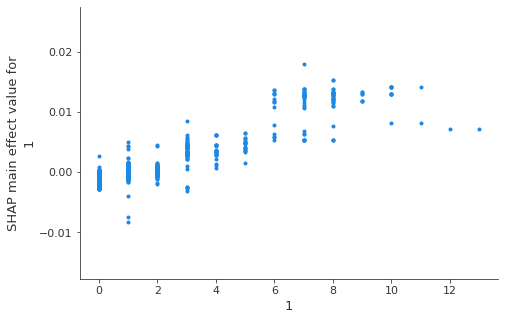

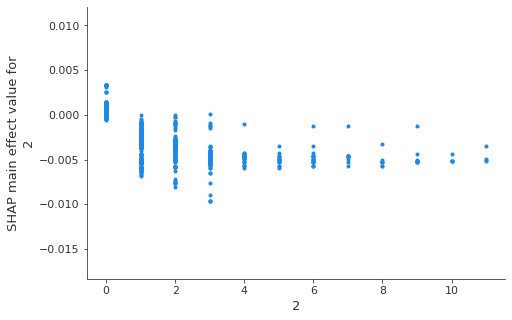

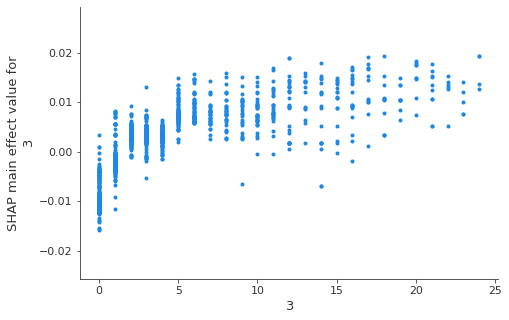

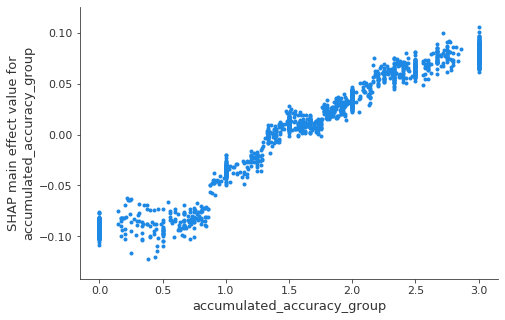

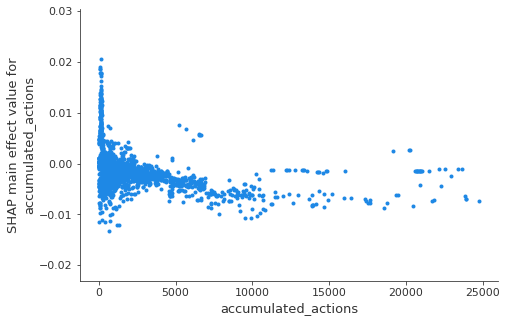

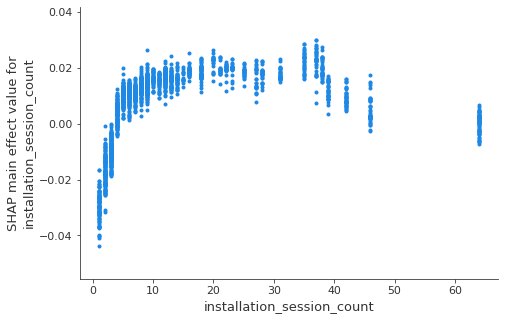

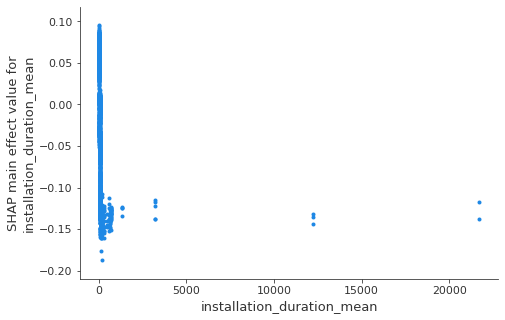

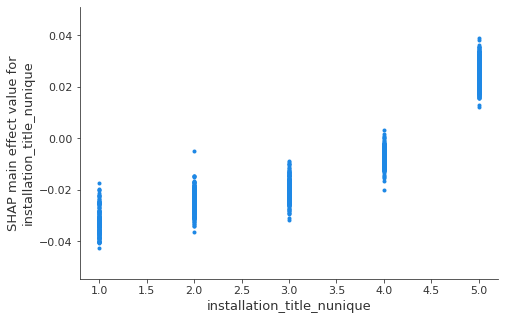

In [21]:
import time
for col in train_X.columns.to_list():
    shap.dependence_plot(
        ( col,col),
        shap_interaction_values, train_X.iloc[:2000,:],
        display_features=train_X.iloc[:2000,:]
    )
    time.sleep(0.5)

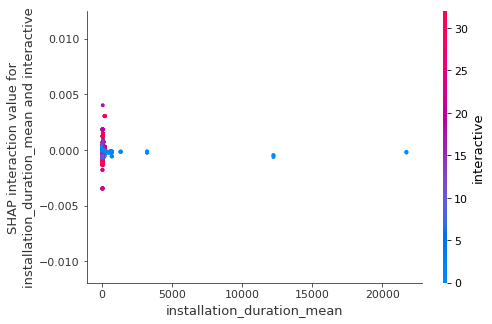

In [52]:
shap.dependence_plot(
        ( "installation_duration_mean","interactive"),
        shap_interaction_values, train_X.iloc[:2000,:],
        display_features=train_X.iloc[:2000,:]
    )


In [79]:
shap_interaction_values.shape

(2000, 108, 108)

In [22]:
train_X["installation_duration_mean"]

ValueError: plot kind scatter can only be used for data frames

In [33]:
reduce_train, reduce_test , _ = preprocess(reduce_train, reduce_test)

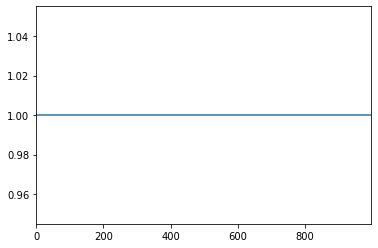

In [47]:
reduce_test["installation_title_nunique"].plot()


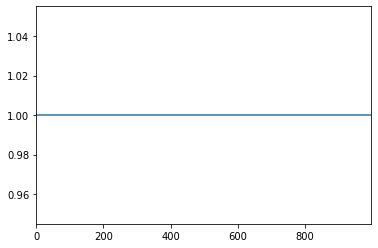

In [46]:
reduce_test['installation_session_count'].plot()

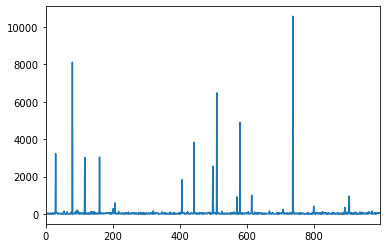

In [45]:
reduce_test['installation_duration_mean'].plot()

In [50]:
test.groupby("installation_id").last()

,event_id,game_session,timestamp,event_data,event_count,event_code,game_time,title,type,world
installation_id,,,,,,,,,,
00abaee7,90d848e0,348d7f09f96af313,2019-09-12T13:52:12.193Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",1,2000,0,Cauldron Filler (Assessment),Assessment,MAGMAPEAK
01242218,7ad3efc6,1fef5d54cb4b775a,2019-10-09T20:23:16.209Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",1,2000,0,Cart Balancer (Assessment),Assessment,CRYSTALCAVES
017c5718,3bfd1a65,4b165a330a0bdd6c,2019-09-21T11:28:21.757Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",1,2000,0,Mushroom Sorter (Assessment),Assessment,TREETOPCITY
01a44906,3bfd1a65,be0b655ad1fee30c,2019-07-27T16:28:10.394Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",1,2000,0,Mushroom Sorter (Assessment),Assessment,TREETOPCITY
01bc6cb6,7ad3efc6,46e8bbed71df7520,2019-09-06T18:05:26.197Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",1,2000,0,Cart Balancer (Assessment),Assessment,CRYSTALCAVES
...,...,...,...,...,...,...,...,...,...,...
fee254cf,90d848e0,d0ea3550fd72f6c1,2019-09-28T01:44:50.390Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",1,2000,0,Cauldron Filler (Assessment),Assessment,MAGMAPEAK
ff57e602,5b49460a,d22d3b1442967ba7,2019-10-13T17:18:24.776Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",1,2000,0,Chest Sorter (Assessment),Assessment,CRYSTALCAVES
ffc73fb2,7ad3efc6,fd5e0fd3fe28f907,2019-10-07T20:36:58.937Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",1,2000,0,Cart Balancer (Assessment),Assessment,CRYSTALCAVES


In [79]:
import torch

ModuleNotFoundError: No module named 'torch'

In [80]:
import torch

In [83]:
# list(map(int, input().split()))
N, K = list(map(int, input().split()))
heights = list(map(int, input().split()))

n_count = 0
for h in heights:
    if h>=K:
        n_count += 1
print(n_count)

4 5
4 5 6 2


In [84]:
n_count

2

In [85]:
# list(map(int, input().split()))
N, T = list(map(int, input().split()))

min_c = []
for i in range(N):
    c_i, t_i = list(map(int, input().split()))
    if T>=t_i:
        min_c.append(c_i)

if not min_c:
    print("TLE")
else:
    print(min(min_c))


ValueError: not enough values to unpack (expected 2, got 0)

In [87]:
min([3,3,3,3])

3

In [88]:
S="01010111110111000000"

In [104]:
S_lst = [s for s in S]

In [128]:
'2 3'
Ms = ['1 32','2 63','1 12']

In [148]:
import heapq
N, M =  list(map(int, input().split()))
prefs = dict()
cities = []
for m in range(M):
    Pm, Ym = input().split()
    cities.append([Pm, Ym])
    if prefs.get(Pm) is None:
        prefs[Pm] = []
    # heapをどう使うか？
    heapq.heappush(prefs[Pm], Ym)


print()

        

In [151]:
# prefs['1'].index(12)

In [152]:
import heapq
N, M =  list(map(int, input().split()))
prefs = dict()
cities = []
for m in range(M):
    Pm, Ym = input().split()
    Ym = int(Ym)
    cities.append([Pm, Ym])
    if prefs.get(Pm) is None:
        prefs[Pm] = []
    # heapをどう使うか？
    heapq.heappush(prefs[Pm], Ym)

output = ""
for p, y in cities:
    under_6digits = str(prefs[p].index(y) + 1)
    output += p.zfill(6) + under_6digits.zfill(6) + '\n'

ValueError: not enough values to unpack (expected 2, got 0)

In [154]:
output = ""
for p, y in cities:
    under_6digits = str(prefs[p].index(y) + 1)
    output += p.zfill(6) + under_6digits.zfill(6) + '\n'
cities

[['1', '32'], ['2', '63'], ['1', '12']]

In [155]:
output

'000001000002\n000002000001\n000001000001\n'

In [123]:
import heapq
a = []

In [124]:
heapq.heapify(a)
a

[]

In [125]:
heapq.heappush(a, 2)

In [126]:
a

[2]

In [109]:
S_lst.count('1')

10

N - Colorful Tree

In [127]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]